# Seasonal Traffic Accident Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium as fm

from datetime import datetime, timedelta
from IPython.display import IFrame    
from IPython.display import display
from seaborn import countplot
from mpl_toolkits.mplot3d import Axes3D
import math

DATA_DIR = "C:\\Users\\johnm\\OneDrive - City, University of London\\MSc Data Science\\2. INM433 - Visual Analytics\\Coursework\\individual\\Data\\"
REPORTS_DIR = "C:\\Users\\johnm\\OneDrive - City, University of London\\MSc Data Science\\2. INM433 - Visual Analytics\\Coursework\\individual\\Reports\\"

# Area selection
Taking the UK as whole would be very difficult due to local influences i.e. certain areas will be more prone to holiday traffic so in order to aid the choice of area. I will produce a map of the UK with the accidents plotted which will be reviewed to identify a suitable area. Once an area is chosen, I will plot the number of accidents by month and review to determine whether there is seasonal variation, which, in turn will inform my choice of area. 


In [3]:
#import traffic accident information
trafficAccidents = pd.read_csv(DATA_DIR + "Accident_information.csv", dtype={"Accident_Index":np.str, \
                                                                            "1st_Road_Class":"category", \
                                                                            "1st_Road_Number":np.float, \
                                                                            "2nd_Road_Class":"category", \
                                                                            "2nd_Road_Number":np.float, \
                                                                            "Accident_Severity":"category", \
                                                                            "Carriageway_Hazards":"category", \
                                                                            "Date":"str", \
                                                                            "Day_of_Week":"category", \
                                                                            "Did_Police_Officer_Attend_Scene_of_Accident":np.str, \
                                                                            "Junction_Control":"category", \
                                                                            "Junction_Detail":"category", \
                                                                            "Latitude":np.float, \
                                                                            "Light_Conditions":"category", \
                                                                            "Local_Authority_(District)":"category", \
                                                                            "Local_Authority_(Highway)":"category", \
                                                                            "Location_Easting_OSGR":np.float, \
                                                                            "Location_Northing_OSGR":np.float, \
                                                                            "Longitude":np.float, \
                                                                            "LSOA_of_Accident_Location":np.str, \
                                                                            "Number_of_Casualties":np.float, \
                                                                            "Number_of_Vehicles":np.float, \
                                                                            "Pedestrian_Crossing-Human_Control":np.float, \
                                                                            "Pedestrian_Crossing-Physical_Facilities":np.float, \
                                                                            "Police_Force":"category", \
                                                                            "Road_Surface_Conditions":"category", \
                                                                            "Road_Type":"category", \
                                                                            "Special_Conditions_at_Site":"category", \
                                                                            "Speed_limit":np.float, \
                                                                            "Time":"str", \
                                                                            "Urban_or_Rural_Area":"category", \
                                                                            "Weather_Conditions":"category", \
                                                                            "Year":np.int32, \
                                                                            "InScotland":np.str}, parse_dates=["Date", "Time"])

trafficAccidents.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,None,2005-01-04,Tuesday,1,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,2018-12-23 17:42:00,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,None,2005-01-05,Wednesday,1,...,Metropolitan Police,Dry,Dual carriageway,None,30.0,2018-12-23 17:36:00,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,None,2005-01-06,Thursday,1,...,Metropolitan Police,Dry,Single carriageway,None,30.0,2018-12-23 00:15:00,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,None,2005-01-07,Friday,1,...,Metropolitan Police,Dry,Single carriageway,None,30.0,2018-12-23 10:35:00,Urban,Fine no high winds,2005,No
4,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,None,2005-01-10,Monday,1,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,2018-12-23 21:13:00,Urban,Fine no high winds,2005,No


In [5]:
# check numeric variables distribution
display(trafficAccidents.describe())

# Check numbers of missing
display(trafficAccidents.isnull().sum(axis=0))

,1st_Road_Number,2nd_Road_Number,Latitude,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Speed_limit,Year
count,1.917272e+06,1.899834e+06,1.917129e+06,1.917129e+06,1.917129e+06,1.917128e+06,1.917274e+06,1.917274e+06,1.916928e+06,1.916479e+06,1.917237e+06,1.917274e+06
mean,1.001601e+03,3.776881e+02,5.256794e+01,4.407870e+05,2.977876e+05,-1.419765e+00,1.347900e+00,1.833212e+00,9.580955e-03,7.444151e-01,3.895106e+01,2.010085e+03
std,1.816643e+03,1.296353e+03,1.449316e+00,9.548363e+04,1.609533e+05,1.403532e+00,8.213597e-01,7.145472e-01,1.290899e-01,1.826980e+00,1.415302e+01,3.479235e+00
min,0.000000e+00,0.000000e+00,4.991294e+01,6.495000e+04,1.029000e+04,-7.516225e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.005000e+03
25%,0.000000e+00,0.000000e+00,5.148663e+01,3.773460e+05,1.778900e+05,-2.341349e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,3.000000e+01,2.007000e+03
50%,1.240000e+02,0.000000e+00,5.225458e+01,4.422600e+05,2.632600e+05,-1.374138e+00,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,3.000000e+01,2.010000e+03
75%,7.200000e+02,0.000000e+00,5.345975e+01,5.238100e+05,3.960700e+05,-2.111217e-01,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,5.000000e+01,2.013000e+03
max,9.999000e+03,9.999000e+03,6.075754e+01,6.555400e+05,1.208800e+06,1.762010e+00,9.300000e+01,6.700000e+01,2.000000e+00,8.000000e+00,7.000000e+01,2.016000e+03


Accident_Index                                      0
1st_Road_Class                                      0
1st_Road_Number                                     2
2nd_Road_Class                                 789860
2nd_Road_Number                                 17440
Accident_Severity                                   0
Carriageway_Hazards                                 0
Date                                                0
Day_of_Week                                         0
Did_Police_Officer_Attend_Scene_of_Accident       278
Junction_Control                                    0
Junction_Detail                                     0
Latitude                                          145
Light_Conditions                                    0
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
Location_Easting_OSGR                             145
Location_Northing_OSGR                            145
Longitude                   

The only numeric variables that are of major interest wrt to distributions are # casaulities, # vehicles, #speed limit

There are some variables with high numbers of missing data but on quick review, they dont probably arent going to be ones that I will be using 

In [6]:
#... have to remove the long and lat missing cases.
trafficAccidents.dropna(subset=['Latitude','Longitude'], inplace=True)

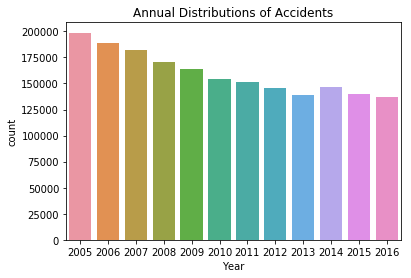

In [7]:
# Get yearly distribution
countplot(trafficAccidents.Year);
plt.title("Annual Distributions of Accidents");
plt.savefig("")

Lets look at regional distribution to see if there are any areas that look like a good candidate for refining the anlaysis down to

In [8]:
kms_per_radian = 6371.0088
spatial_dist_max = 20 / kms_per_radian

def great_circle(lat1, long1, lat2, long2):

    # Convert latitude and longitude to 
    # spherical coordinates in radians.
    degrees_to_radians = math.pi/180.0
        
    # phi = 90 - latitude
    phi1 = (90.0 - lat1)*degrees_to_radians
    phi2 = (90.0 - lat2)*degrees_to_radians
        
    # theta = longitude
    theta1 = long1*degrees_to_radians
    theta2 = long2*degrees_to_radians
    
    # Compute spherical distance from spherical coordinates.
        
    # For two locations in spherical coordinates 
    # (1, theta, phi) and (1, theta, phi)
    # cosine( arc length ) = 
    #    sin phi sin phi' cos(theta-theta') + cos phi cos phi'
    # distance = rho * arc length
    
    cos = (math.sin(phi1)*math.sin(phi2)*math.cos(theta1 - theta2) + 
           math.cos(phi1)*math.cos(phi2))
    
    if (cos > 1.0):
        cos = 1.0

    arc = math.acos( cos )

    # Remember to multiply arc by the radius of the earth 
    # in your favorite set of units to get length.
    return arc

def SpaceDistance(xLat, xLon, yLat, yLon):
    try:
        gc_dist = great_circle(xLat,xLon,yLat,yLon)
    except ValueError:
        gc_dist = False
    
    if (gc_dist>spatial_dist_max):
        return False
    else:
        return True

In [519]:
# Latitude & Longitude for:
normalTowns = [{"name": "Didcot","Latitude":51.6080,"Longitude": -1.2448,"idx":1,"color":"red"},
                {"name":"Bath Road area, Worchester","Latitude":52.1868,"Longitude": -2.2228,"idx":2,"color":"blue"},
                {"name":"Southwick, West Sussex","Latitude":50.8353,"Longitude": 0.2382,"idx":3,"color":"green"},
                {"name":"East Leake, Nottinghamshire","Latitude":52.8291,"Longitude": 1.1831,"idx":4,"color":"yellow"}]


In [686]:
spatial_dist_max = 10 / kms_per_radian
# only keep last 12 months
ta = trafficAccidents[trafficAccidents["Year"] == 2016]

# create the map
xmm=(ta.Latitude.min()+ta.Latitude.max())/2
ymm=(ta.Longitude.min()+ta.Longitude.max())/2
map = fm.Map(location=[xmm,ymm], zoom_start=10)
for town in normalTowns:

    # filter data based on distance check
    tmp = ta.apply(lambda x: SpaceDistance(x["Latitude"], x["Longitude"], town["Latitude"], town["Longitude"]),axis=1)    
    tat = ta[tmp]
    
    # plot on map :)
    tat.apply(lambda row: fm.CircleMarker((row.Latitude, row.Longitude),radius=0.2).add_to(map), axis=1)
    

map.save(REPORTS_DIR + "normal_towns.html")


In [11]:
# WARNING TAKES 30 MINS TO RUN!
# Filter accident data to just include the new flagged data points, across all years
# Set back in the town flag 1,2,3,4
for town in normalTowns:

    # filter data based on distance check
    tmp = trafficAccidents.apply(lambda x: SpaceDistance(x["Latitude"], x["Longitude"], town["Latitude"], town["Longitude"]),axis=1)    
    trafficAccidents.loc[tmp,"keep"] = True
    trafficAccidents.loc[tmp,"town"] = town["name"]
    print(town["name"])


Didcot
Bath Road area, Worchester
Southwick, West Sussex
East Leake, Nottinghamshire


In [12]:
trafficAccidents["town"].astype("category",copy=False);
accidents = trafficAccidents.drop(trafficAccidents[trafficAccidents["keep"].isna()].index);

There do appear to be some seasonal variations but there also appears to be very different trends so lets examine each year to see whether there was an event that could have changed behaviour at some point

In [13]:
# Create month and month count variables for visualisation purposes
accidents.loc[:,"MonthCount"] = accidents["Date"].apply(lambda x: 12*(x.year-2005) + x.month)
accidents.loc[:,"Month"] = accidents["Date"].apply(lambda x: x.month)
accidents.loc[:, "Hour"] = accidents["Time"].apply(lambda x: x.hour)

Important to understand seasonal variation in number of accidents. Use a heatmap to easily visualise whether this is the case or not.

In [4]:
# Now plot the frequency of accidents by week
import seaborn as sns; sns.set()

f = plt.figure(figsize=(40,5))
for town in normalTowns:
    ax = plt.subplot(1,4,town["idx"])
    data = accidents[accidents["town"] == town["name"]]
    table = pd.pivot_table(data, values="Accident_Index", index=["Year"], columns=["Hour"], aggfunc=np.count_nonzero)
    ax = sns.heatmap(table)
    plt.title("Concentration of accidents (year by month) - %s" % (town["name"]))
    plt.yticks(rotation='horizontal')

plt.savefig(REPORTS_DIR + "Heatmaps.png")

NameError: name 'normalTowns' is not defined

<Figure size 2880x360 with 0 Axes>

There seems to have been a big change in number of traffic accidents pre and post 2010. The 2005-2010 data is dominiating the heatmaps making it difficult to determine if there is seasonal variation.

Remove data pre-2010 and re-do

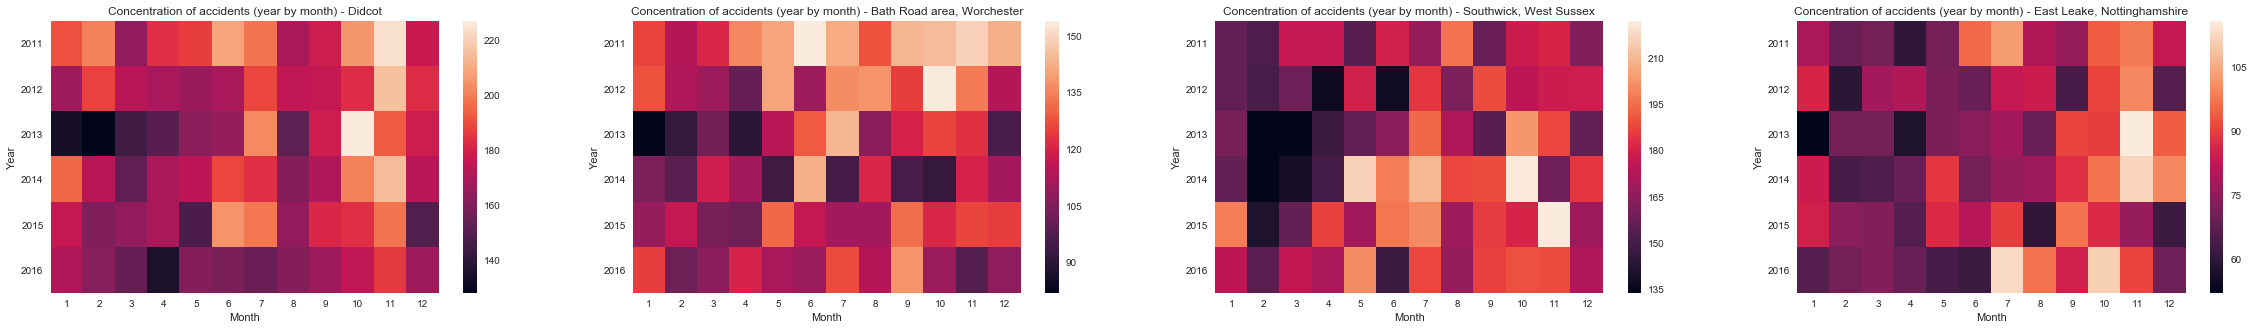

In [15]:
f = plt.figure(figsize=(40,5))
for town in normalTowns:
    ax = plt.subplot(1,4,town["idx"])
    data = accidents[(accidents["town"] == town["name"]) & (accidents["Year"] > 2010)]
    table = pd.pivot_table(data, values="Accident_Index", index=["Year"], columns=["Month"], aggfunc=np.count_nonzero)
    ax = sns.heatmap(table)
    plt.title("Concentration of accidents (year by month) - %s" % (town["name"]))
    plt.yticks(rotation='horizontal')

plt.savefig(REPORTS_DIR + "Heatmaps2010.png")

Remove pre 2010 as there was a big change in behaviours

In [16]:
display(len(accidents))
accidents.drop(accidents[trafficAccidents["Year"] < 2010].index, inplace=True);
display(len(accidents))

87557

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


46270

In conclusion we have:
1. Identified the areas that we will be focusing on
2. Determined the radius around these areas to include accident data
3. Determined that there was a big shift in traffic accident data pre & post 2010 so excluded that data

# Count data

In [19]:
# load data for major and minor roads
trafficCountsMajor = pd.read_csv(DATA_DIR + "Raw-count-data-major-roads.csv", parse_dates=["dCount"])
trafficCountsMinor = pd.read_csv(DATA_DIR + "Raw-count-data-minor-roads.csv", parse_dates=["dCount"])


trafficCounts = pd.concat([trafficCountsMajor,trafficCountsMinor])
trafficCounts.rename(index=str, columns={"S Ref Latitude":"Latitude", "S Ref Longitude": "Longitude"},inplace=True)
display(trafficCounts.head())
display(trafficCounts.info())

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


,2WMV,A Ref E,A Ref N,A-Junction,AMV,B Ref E,B Ref N,B-Junction,BUS,CAR,...,Region Name (GO),Road,Road Name,S Ref E,Latitude,Longitude,S Ref N,Year,dCount,iDir
0,6,328380.0,185830.0,28,3460.0,328400.0,187800.0,27,33.0,2491.0,...,Wales,M4,NaN,328570,51.57732,-3.032184,187000,2000,2000-06-09,E
1,12,328380.0,185830.0,28,4168.0,328400.0,187800.0,27,46.0,3193.0,...,Wales,M4,NaN,328570,51.57732,-3.032184,187000,2000,2000-06-09,E
2,9,328380.0,185830.0,28,3167.0,328400.0,187800.0,27,30.0,2221.0,...,Wales,M4,NaN,328570,51.57732,-3.032184,187000,2000,2000-06-09,E
3,7,328380.0,185830.0,28,3090.0,328400.0,187800.0,27,28.0,2161.0,...,Wales,M4,NaN,328570,51.57732,-3.032184,187000,2000,2000-06-09,E
4,7,328380.0,185830.0,28,3337.0,328400.0,187800.0,27,31.0,2359.0,...,Wales,M4,NaN,328570,51.57732,-3.032184,187000,2000,2000-06-09,E


<class 'pandas.core.frame.DataFrame'>
Index: 3495416 entries, 0 to 1743059
Data columns (total 35 columns):
2WMV                int64
A Ref E             float64
A Ref N             float64
A-Junction          object
AMV                 float64
B Ref E             float64
B Ref N             float64
B-Junction          object
BUS                 float64
CAR                 float64
CP                  int64
CP Location         object
HGV                 float64
HGVA3               float64
HGVA5               int64
HGVA6               float64
HGVR2               float64
HGVR3               float64
HGVR4               float64
Hour                int64
LGV                 int64
ONS LA Name         object
ONS LACode          object
PC                  int64
RCat                object
Region Name (GO)    object
Road                object
Road Name           object
S Ref E             int64
Latitude            float64
Longitude           float64
S Ref N             int64
Year                i

None

In [20]:
# we now need to plot and keep the data within same radius as accident data
spatial_dist_max = 30 / kms_per_radian

# only keep last 12 months
tc = trafficCounts[trafficCounts["Year"] == 2016]

# create the map
xmm=(accidents.Latitude.min()+accidents.Latitude.max())/2
ymm=(accidents.Longitude.min()+accidents.Longitude.max())/2
map = fm.Map(location=[xmm,ymm], zoom_start=10)

# add all the accident points as we have already filtered them
accidents[accidents["Year"] == 2016] \
    .apply(lambda row: fm.CircleMarker((row.Latitude, row.Longitude),radius=0.2).add_to(map), axis=1)


for town in normalTowns:
    # filter data based on distance check
    # filter data based on distance check
    tmp = tc.apply(lambda x: SpaceDistance(x["Latitude"], x["Longitude"], town["Latitude"], town["Longitude"]),axis=1)    
    tct = tc[tmp]
    
    # plot on map :)
    tct.apply(lambda row: fm.CircleMarker((row.Latitude, row.Longitude),radius=0.5, color='red').add_to(map), axis=1)    
    
map.save(REPORTS_DIR + "normal_towns_with_counts.html")


This demonstrates that there is geographical overlaps of the points but ... we need a spatio-temporal distance measure to  group the accidents into.

1. Keep these identified points
2. Review periodocity in order to detemine what would be a viable temporal amount
3. Create the parameters for spatio-temporal function
4. What to do with overlapping accidents ... average the counts


In [21]:
# WARNING TAKES 30 MINS TO RUN!
# Filter accident data to just include the new flagged data points, across all years
# Set back in the town flag 1,2,3,4
for town in normalTowns:

    # filter data based on distance check
    tmp = trafficCounts.apply(lambda x: SpaceDistance(x["Latitude"], x["Longitude"], town["Latitude"], town["Longitude"]),axis=1)    
    trafficCounts.loc[tmp,"keep"] = True
    trafficCounts.loc[tmp,"town"] = town["name"]
    print(town["name"])
    

Didcot
Bath Road area, Worchester
Southwick, West Sussex
East Leake, Nottinghamshire


In [22]:
# categorise town and drop rest
trafficCounts["town"].astype("category",copy=False);
counts = trafficCounts.drop(trafficCounts[trafficCounts["keep"].isna()].index);
display(len(counts))
counts.drop(counts[counts["Year"] < 2010].index,inplace=True)
display(len(counts))

10968

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


2728

Get some basic info on when: days of week & times of day

In [23]:
# set up some time variables
counts.loc[:,"Month"] = counts["dCount"].apply(lambda x: x.month)
counts.loc[:,"DoW"] = counts["dCount"].apply(lambda x: x.dayofweek)
counts.loc[:,"MonthCount"] = counts["dCount"].apply(lambda x: 12*(x.year-2010) + x.month)

# get a view on it
counts.head()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,2WMV,A Ref E,A Ref N,A-Junction,AMV,B Ref E,B Ref N,B-Junction,BUS,CAR,...,Longitude,S Ref N,Year,dCount,iDir,keep,town,Month,DoW,MonthCount
1250772,3,557122.0,111224.0,A267,737.0,556486.0,111319.0,Coldharbour Road,1.0,556.0,...,0.230306,111180,2010,2010-09-20,E,True,"Southwick, West Sussex",9,0,9
1250773,7,557122.0,111224.0,A267,686.0,556486.0,111319.0,Coldharbour Road,4.0,471.0,...,0.230306,111180,2010,2010-09-20,E,True,"Southwick, West Sussex",9,0,9
1250774,2,557122.0,111224.0,A267,685.0,556486.0,111319.0,Coldharbour Road,2.0,501.0,...,0.230306,111180,2010,2010-09-20,E,True,"Southwick, West Sussex",9,0,9
1250775,8,557122.0,111224.0,A267,793.0,556486.0,111319.0,Coldharbour Road,3.0,592.0,...,0.230306,111180,2010,2010-09-20,E,True,"Southwick, West Sussex",9,0,9
1250776,6,557122.0,111224.0,A267,770.0,556486.0,111319.0,Coldharbour Road,5.0,583.0,...,0.230306,111180,2010,2010-09-20,E,True,"Southwick, West Sussex",9,0,9


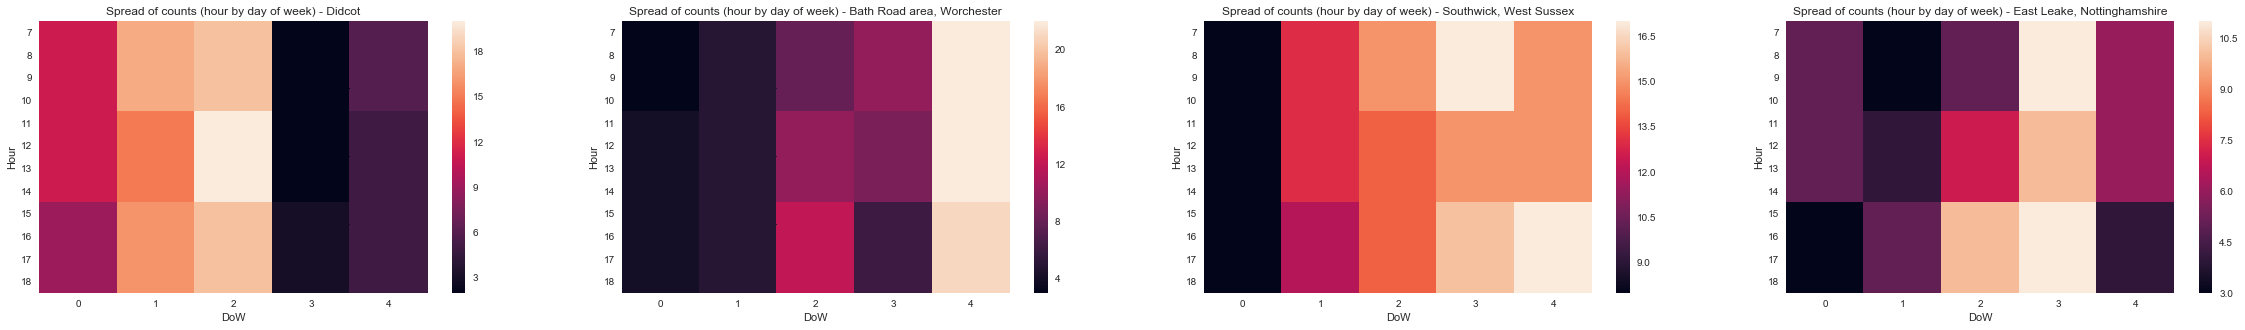

In [24]:
f = plt.figure(figsize=(40,5))
for town in normalTowns:
    ax = plt.subplot(1,4,town["idx"])
    data = counts[(counts["town"] == town["name"]) & (counts["Year"] > 2010)]
    table = pd.pivot_table(data, values="AMV", index=["Hour"], columns=["DoW"], aggfunc=np.count_nonzero)
    ax = sns.heatmap(table)
    plt.title("Spread of counts (hour by day of week) - %s" % (town["name"]))
    plt.yticks(rotation='horizontal')

plt.savefig(REPORTS_DIR + "counts_hour_by_dow.png")

The time only spans 7am to 6pm; so we will need to limit our scope to these timeframes.

Only certain days are recorded so we will not be able to cover weekend accidents, nor will we be able to use dow as a temporal variable.

Re-run by month to ensure that we have at least monthly information.

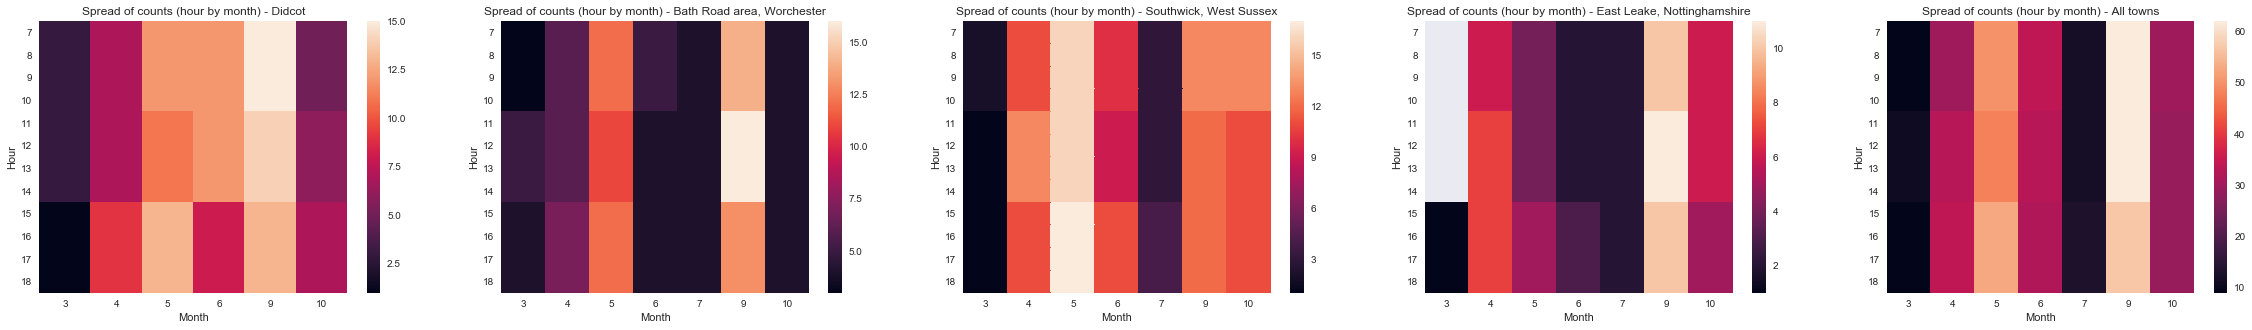

In [25]:
f = plt.figure(figsize=(40,5))
for town in normalTowns:
    ax = plt.subplot(1,5,town["idx"])
    data = counts[(counts["town"] == town["name"]) & (counts["Year"] > 2010)]
    table = pd.pivot_table(data, values="AMV", index=["Hour"], columns=["Month"], aggfunc=np.count_nonzero)
    ax = sns.heatmap(table)
    plt.title("Spread of counts (hour by month) - %s" % (town["name"]))
    plt.yticks(rotation='horizontal')

ax = plt.subplot(1,5,5)
table = pd.pivot_table(counts, values="AMV", index=["Hour"], columns=["Month"], aggfunc=np.count_nonzero)
ax = sns.heatmap(table)
plt.title("Spread of counts (hour by month) - All towns")
plt.yticks(rotation='horizontal')    
plt.savefig(REPORTS_DIR + "counts_hour_by_month.png")

In [154]:
# Remove hours <7 & > 18 
display(len(accidents))
accidents.drop(accidents[accidents["Hour"]<7].index,inplace=True)
accidents.drop(accidents[accidents["Hour"]>18].index,inplace=True)

# Remove hours <7 & > 18 
accidents.drop(accidents[accidents["Month"]==1].index,inplace=True)
accidents.drop(accidents[accidents["Month"]==2].index,inplace=True)
accidents.drop(accidents[accidents["Month"]==8].index,inplace=True)
accidents.drop(accidents[accidents["Month"]==11].index,inplace=True)
accidents.drop(accidents[accidents["Month"]==12].index,inplace=True)
display(len(accidents))

36135

21498

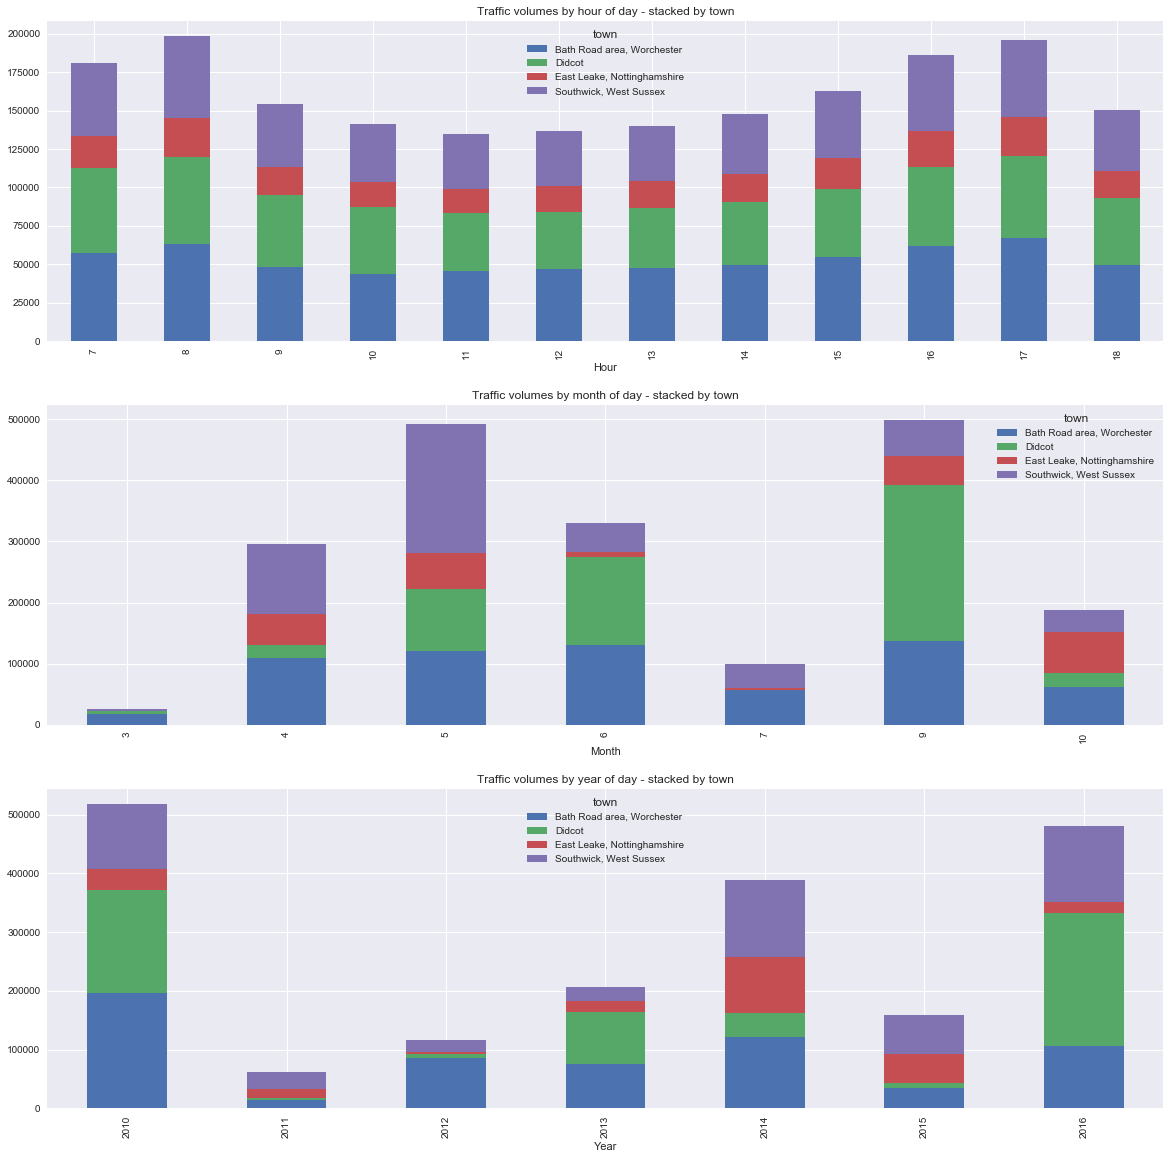

In [690]:
# Just want to review the counts of time of stack by town
plt.figure(figsize=(20,20))
ax = plt.subplot(3,1,1)
counts.groupby(["Hour","town"]).sum()["AMV"].unstack().plot(kind='bar', stacked=True, ax=ax,);
plt.title("Traffic volumes by hour of day - stacked by town");

ax = plt.subplot(3,1,2)
counts.groupby(["Month","town"]).sum()["AMV"].unstack().plot(kind='bar', stacked=True, ax=ax,);
plt.title("Traffic volumes by month of day - stacked by town");

ax = plt.subplot(3,1,3)
counts.groupby(["Year","town"]).sum()["AMV"].unstack().plot(kind='bar', stacked=True, ax=ax,);
plt.title("Traffic volumes by year of day - stacked by town");
plt.savefig(REPORTS_DIR + "traffic_volumnes_.png")

Theres is no full seasonal coverage

As there will be overlapping of counts & loctions, cluster based on a spatio-temporal value

spatio: 2km
temporal: same month, same hour

In [27]:
# Now lets do the clustering
from sklearn.cluster import DBSCAN

In [87]:


def SpaceTimeDistance(x,y):
    #print('Params = {},{}'.format(spatial_dist_max,temporal_dist_max))

    diff_year = abs(x[2] - y[2]) 
    if (np.isnan(diff_year) or diff_year > year_dist):
        return np.Infinity

    diff_month = abs(x[3] - y[3])
    if (np.isnan(diff_month) or diff_month > month_dist):
        return np.Infinity
    
    diff_hour = abs(x[4] - y[4])
    if (np.isnan(diff_hour) or diff_hour > hour_dist):
        return np.Infinity
    
    try:
        gc_dist = great_circle(x[1],x[0],y[1],y[0])
    except ValueError:
        #print(x[1],x[0],y[1],y[0])
        gc_dist = np.Infinity
    
    if (gc_dist>spatial_dist_max):
        return np.Infinity
    
    return gc_dist

In [88]:
# two clusters are needed, one is across time
hour_dist = 12;
month_dist = 12;
year_dist = 7;
spatial_dist_max = 0.2 / kms_per_radian

clustered = DBSCAN(metric=SpaceTimeDistance, min_samples=2).fit(counts[["Longitude","Latitude","Year", "Month","Hour"]])
labels=clustered.labels_
unique_labels=np.unique(clustered.labels_)
#clustered
clust_id_col_name='Cluster1'
counts[clust_id_col_name]=labels


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [89]:
coords = []

for town in normalTowns:
    c = []
    c.append(accidents[accidents["town"] == town["name"]]["Latitude"].min())
    c.append(accidents[accidents["town"] == town["name"]]["Latitude"].max())    
    c.append(accidents[accidents["town"] == town["name"]]["Longitude"].min())
    c.append(accidents[accidents["town"] == town["name"]]["Longitude"].max())
    coords.append(c)
coords[0][0]


np.unique(labels, return_counts=True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158], dtype=int64),
 array([20,  4, 20, 24, 24, 24, 48, 24, 24, 16, 44, 24, 16, 20, 24, 24,  8,
        16

In [692]:
from matplotlib import colors

def ProducePostClusterPlots(uniqueLabels, data, clusterName, zAxes):
    clust_colors = []
    cmap = plt.cm.Spectral(np.linspace(0,1,len(uniqueLabels)))
    for idx,row in enumerate(cmap):
        rgb = row[:3]
        clust_colors.append(colors.rgb2hex(rgb))   

    # plot 3D & 2D versions
    for id, row in data.iterrows():
        cluster_id = row[clusterName]
        if (row[clusterName] != -1):
            fm.CircleMarker((row['Latitude'], row['Longitude']), \
                            radius=2, \
                            color=clust_colors[row[clust_id_col_name]], \
                            fill=True, \
                            popup='Cluster: {}'.format(row[clust_id_col_name])).add_to(map) 

    map.save(REPORTS_DIR + clusterName + ".html")

    # now plot in 3D
    fig = plt.figure(1, figsize=(10, 7))
    for id,row in data.iterrows():
        cluster_id = row[clusterName]
        if (cluster_id==-1):
            color='#000000'
        else:
            color=clust_colors[row[clusterName]]

        data.at[id,'colors']=color

    datann = data[data[clusterName] != -1] # no noise 
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=10, azim=134) # change parameters here for experimenting
    ax.scatter(datann['Longitude'], datann['Latitude'], datann[zAxes], c=datann['colors'], alpha=0.5)
    plt.show()
    plt.savefig(REPORTS_DIR + clusterName + "2_3d.png");

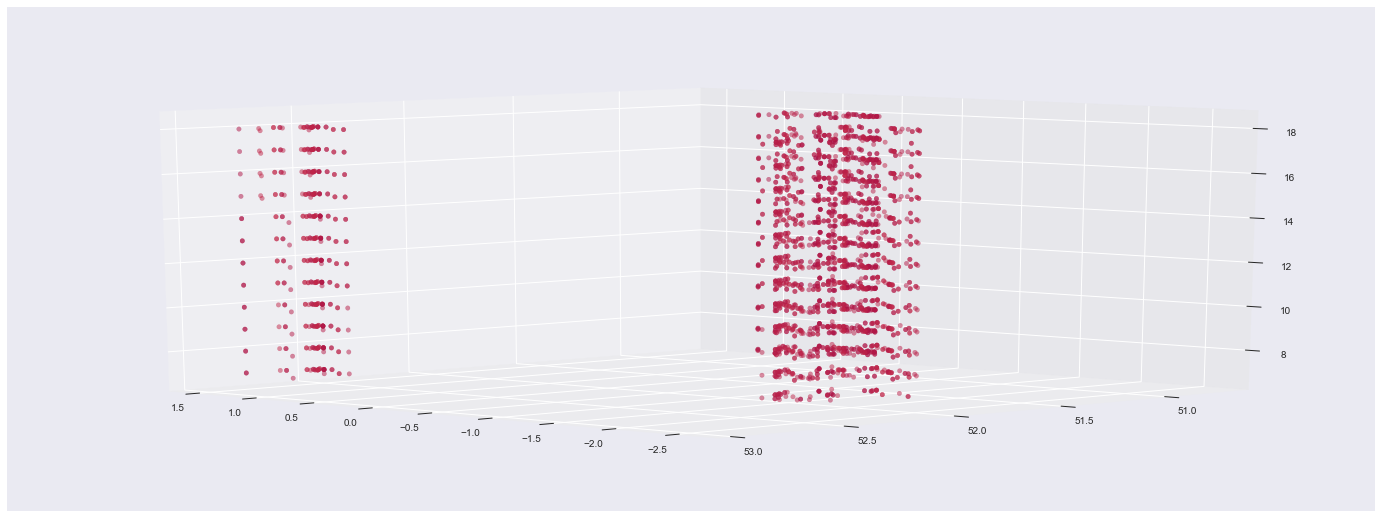

<Figure size 432x288 with 0 Axes>

In [691]:
ProducePostClusterPlots(unique_labels,counts,"Cluster1","Hour" )

Now need to produce some statistics on the clusters

In [91]:
agg_func = {
    "AMV": ['mean','min','max'],
    "Month" : ['min','max'],
    "Year" : ['min','max']
}
st_aggregates = counts.reset_index(drop=False)[['Cluster1','AMV','Month','Year']] \
                .groupby(['Cluster1']).agg(agg_func)

st_aggregates.columns = ["_".join(x) for x in st_aggregates.columns.ravel()]
st_aggregates["MultiMonth"] = (st_aggregates["Month_min"] != st_aggregates["Month_max"])
st_aggregates["MultiYear"] = (st_aggregates["Year_min"] != st_aggregates["Year_max"])

display(st_aggregates)
display(st_aggregates["MultiMonth"].sum())
display(st_aggregates["MultiYear"].sum())

,AMV_mean,AMV_min,AMV_max,Month_min,Month_max,Year_min,Year_max,MultiMonth,MultiYear
Cluster1,,,,,,,,,
0,864.400000,556.0,1435.0,9,9,2010,2010,False,False
1,2410.000000,2092.0,2785.0,9,9,2010,2010,False,False
2,1608.800000,1249.0,2041.0,6,6,2010,2010,False,False
3,2544.791667,1983.0,3226.0,5,5,2010,2010,False,False
4,1538.125000,922.0,2423.0,5,5,2010,2010,False,False
5,3352.375000,2609.0,4632.0,6,6,2010,2010,False,False
6,3108.437500,2102.0,4579.0,4,5,2010,2014,True,True
7,3389.541667,2381.0,5196.0,6,6,2010,2010,False,False
8,1130.583333,750.0,1779.0,9,9,2010,2010,False,False


5

15

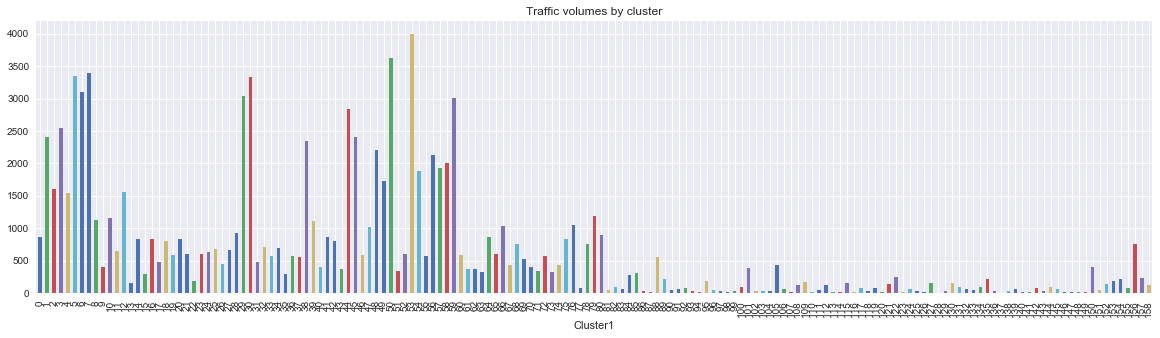

In [478]:
plt.figure(figsize=(20,5))
ax = plt.subplot(1,1,1)
counts.groupby(["Cluster1"]).mean()["AMV"].plot(kind='bar', ax=ax,);
plt.title("Traffic volumes by cluster");

In [479]:
# Now rescale the traffic counts to 0..1 for each cluster
counts.loc[:, "counts_mean_rescaled"] = counts.apply(lambda x: (x["AMV"] - counts["AMV"].min()) / (counts["AMV"].max() - counts["AMV"].min()), axis=1)

for n in np.unique(unique_labels):
    flt = (counts["Cluster1"] == n)
    counts.loc[flt, "AMVR"] = counts[flt].apply(lambda x: (x["AMV"] - counts[flt]["AMV"].min()) / (counts[flt]["AMV"].max() - counts[flt]["AMV"].min()), axis=1)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [190]:
agg_func = {
    "AMV": ['mean','min','max'],
    "AMVR": ['mean','min','max'],
    "Month" : ['min','max'],
    "Year" : ['min','max'],
    "Longitude" : ['min','max'],
    "Latitude" : ['min', 'max'],
    "town" : ['min']
}
cnt_clust1_agg = counts.reset_index(drop=False)[['Cluster1','AMV','AMVR','Month','Year', 'Longitude', 'Latitude','town']] \
                .groupby(['Cluster1']).agg(agg_func)

cnt_clust1_agg.columns = ["_".join(x) for x in cnt_clust1_agg.columns.ravel()]
cnt_clust1_agg["MultiMonth"] = (cnt_clust1_agg["Month_min"] != cnt_clust1_agg["Month_max"])
cnt_clust1_agg["MultiYear"] = (cnt_clust1_agg["Year_min"] != cnt_clust1_agg["Year_max"])
cnt_clust1_agg["Longitude_mid"] = (cnt_clust1_agg["Longitude_min"] + cnt_clust1_agg["Longitude_max"])/2
cnt_clust1_agg["Latitude_mid"] = (cnt_clust1_agg["Latitude_min"] + cnt_clust1_agg["Latitude_max"])/2

display(cnt_clust1_agg.head())

,AMV_mean,AMV_min,AMV_max,AMVR_mean,AMVR_min,AMVR_max,Month_min,Month_max,Year_min,Year_max,Longitude_min,Longitude_max,Latitude_min,Latitude_max,town_min,MultiMonth,MultiYear,Longitude_mid,Latitude_mid
Cluster1,,,,,,,,,,,,,,,,,,,
0,864.400000,556.0,1435.0,0.350853,0.0,1.0,9,9,2010,2010,0.230306,0.230306,50.878794,50.878794,"Southwick, West Sussex",False,False,0.230306,50.878794
1,2410.000000,2092.0,2785.0,0.458874,0.0,1.0,9,9,2010,2010,-1.297267,-1.297267,51.786560,51.786560,Didcot,False,False,-1.297267,51.786560
2,1608.800000,1249.0,2041.0,0.454293,0.0,1.0,6,6,2010,2010,-1.283296,-1.283296,51.606649,51.606649,Didcot,False,False,-1.283296,51.606649
3,2544.791667,1983.0,3226.0,0.451964,0.0,1.0,5,5,2010,2010,-0.090226,-0.090226,50.862176,50.862176,"Southwick, West Sussex",False,False,-0.090226,50.862176
4,1538.125000,922.0,2423.0,0.410476,0.0,1.0,5,5,2010,2010,1.354285,1.354285,52.619513,52.619513,"East Leake, Nottinghamshire",False,False,1.354285,52.619513


In [111]:
# and the second is across a small area so we can determine
# if the traffic in the general area is low, mid, hi
hour_dist = 0;
month_dist = 0;
year_dist = 10;
spatial_dist_max = 5 / kms_per_radian

clustered = DBSCAN(metric=SpaceTimeDistance, min_samples=2).fit(counts[["Longitude","Latitude","Year", "Month","Hour"]])
labels=clustered.labels_
unique_labels=np.unique(clustered.labels_)
#clustered
clust_id_col_name='Cluster2'
counts[clust_id_col_name]=labels

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


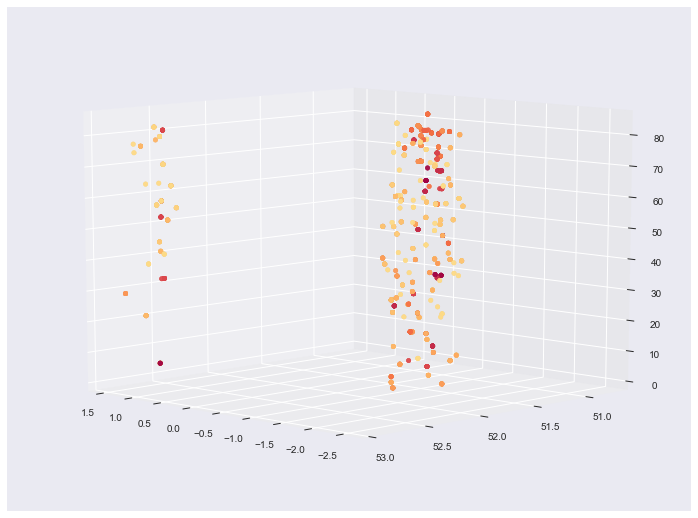

<Figure size 432x288 with 0 Axes>

In [693]:
ProducePostClusterPlots(unique_labels,counts,"Cluster2","MonthCount" )

Re-run stats for Cluster2 ... these are the ones needed to capture the accidents

In [188]:
agg_func = {
    "AMVR" : ['count'],
    "Longitude" : ['min','max'],
    "Latitude" : ['min', 'max'],
    "Hour" : ['min', 'max'],
    "Month" : ['min', 'max'],
    "Year": ['min', 'max'],
    "town" : ['min']
}
cnt_clust2_agg = counts.reset_index(drop=False)[['Cluster2','AMVR', 'Longitude', 'Latitude','Hour','Month','Year','town']] \
                .groupby(['Cluster2']).agg(agg_func)

cnt_clust2_agg.columns = ["_".join(x) for x in cnt_clust2_agg.columns.ravel()]
cnt_clust2_agg["Longitude_mid"] = (cnt_clust2_agg["Longitude_min"] + cnt_clust2_agg["Longitude_max"])/2
cnt_clust2_agg["Latitude_mid"] = (cnt_clust2_agg["Latitude_min"] + cnt_clust2_agg["Latitude_max"])/2

display(st_aggregates.head())

,AMVR_count,Longitude_min,Longitude_max,Latitude_min,Latitude_max,Hour_min,Hour_max,Month_min,Month_max,Year_min,Year_max,Longitude_mid,Latitude_mid
Cluster2,,,,,,,,,,,,,
0,2,0.230306,0.230306,50.878794,50.878794,11,11,9,9,2010,2010,0.230306,50.878794
1,2,0.230306,0.230306,50.878794,50.878794,12,12,9,9,2010,2010,0.230306,50.878794
2,2,0.230306,0.230306,50.878794,50.878794,13,13,9,9,2010,2010,0.230306,50.878794
3,2,0.230306,0.230306,50.878794,50.878794,14,14,9,9,2010,2010,0.230306,50.878794
4,2,0.230306,0.230306,50.878794,50.878794,15,15,9,9,2010,2010,0.230306,50.878794


Now lets assign a cluster to each point, where multiple clusters assign last one and add an increment to show where this is the case

In [114]:
counts["Cluster2"].max()
icluster = counts["Cluster2"].max()+1
for idx, row in counts[counts["Cluster2"]==-1].iterrows():
    counts.loc[idx,"Cluster2"] = icluster
    

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [239]:
agg_func = {
    "AMVR" : ['count'],
    "Longitude" : ['min','max'],
    "Latitude" : ['min', 'max'],
    "Hour" : ['min', 'max'],
    "Month" : ['min', 'max'],
    "Year": ['min', 'max'],
    "town" : ['min']
}
cnt_clust2_agg = counts.reset_index(drop=False)[['Cluster2','AMVR', 'Longitude', 'Latitude','Hour','Month','Year','town']] \
                .groupby(['Cluster2']).agg(agg_func)

cnt_clust2_agg.columns = ["_".join(x) for x in cnt_clust2_agg.columns.ravel()]
cnt_clust2_agg["Longitude_mid"] = (cnt_clust2_agg["Longitude_min"] + cnt_clust2_agg["Longitude_max"])/2
cnt_clust2_agg["Latitude_mid"] = (cnt_clust2_agg["Latitude_min"] + cnt_clust2_agg["Latitude_max"])/2

display(cnt_clust2_agg.head())

,AMVR_count,Longitude_min,Longitude_max,Latitude_min,Latitude_max,Hour_min,Hour_max,Month_min,Month_max,Year_min,Year_max,town_min,Longitude_mid,Latitude_mid
Cluster2,,,,,,,,,,,,,,
0,2,0.230306,0.230306,50.878794,50.878794,11,11,9,9,2010,2010,"Southwick, West Sussex",0.230306,50.878794
1,2,0.230306,0.230306,50.878794,50.878794,12,12,9,9,2010,2010,"Southwick, West Sussex",0.230306,50.878794
2,2,0.230306,0.230306,50.878794,50.878794,13,13,9,9,2010,2010,"Southwick, West Sussex",0.230306,50.878794
3,2,0.230306,0.230306,50.878794,50.878794,14,14,9,9,2010,2010,"Southwick, West Sussex",0.230306,50.878794
4,2,0.230306,0.230306,50.878794,50.878794,15,15,9,9,2010,2010,"Southwick, West Sussex",0.230306,50.878794


In [ ]:


hour_dist = 0;
month_dist = 0;
year_dist = 10;
spatial_dist_max = 5 / kms_per_radian

print(datetime.now())
clustered = DBSCAN(metric=SpaceTimeDistance, min_samples=2).fit(accidents[["Longitude","Latitude","Year", "Month","Hour"]])
print(datetime.now())

labels=clustered.labels_
unique_labels=np.unique(clustered.labels_)
#clustered
clust_id_col_name='Cluster1'
accidents[clust_id_col_name]=labels

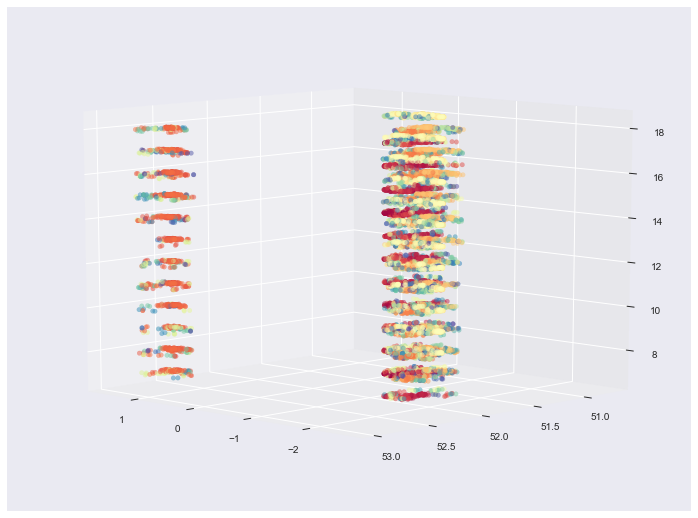

<Figure size 432x288 with 0 Axes>

In [694]:
ProducePostClusterPlots(unique_labels,accidents,"Cluster1","Hour" )

In [297]:
agg_func = {
    "Accident_Index" : ['count'],
    "Longitude" : ['min','max'],
    "Latitude" : ['min', 'max'],
    "Hour" : ['min', 'max'],
    "Month" : ['min', 'max'],
    "Year": ['min', 'max'],
    "town" : ['min']
}
acc_clust1_agg = accidents.reset_index(drop=False)[['Cluster1','Accident_Index', 'Longitude', 'Latitude','Hour','Month','Year','town']] \
                .groupby(['Cluster1']).agg(agg_func)

acc_clust1_agg.columns = ["_".join(x) for x in acc_clust1_agg.columns.ravel()]
acc_clust1_agg["Longitude_mid"] = (acc_clust1_agg["Longitude_min"] + acc_clust1_agg["Longitude_max"])/2
acc_clust1_agg["Latitude_mid"] = (acc_clust1_agg["Latitude_min"] + acc_clust1_agg["Latitude_max"])/2

display(acc_clust1_agg)

,Accident_Index_count,Longitude_min,Longitude_max,Latitude_min,Latitude_max,Hour_min,Hour_max,Month_min,Month_max,Year_min,Year_max,town_min,Longitude_mid,Latitude_mid
Cluster1,,,,,,,,,,,,,,
-1,2533,-2.648193,1.592540,50.743184,52.958159,7,18,3,10,2010,2016,"Bath Road area, Worchester",-0.527826,51.850671
0,4,-2.030237,-1.975859,52.388741,52.407802,7,7,3,3,2010,2010,"Bath Road area, Worchester",-2.003048,52.398271
1,22,-2.067170,-1.871766,52.263702,52.411041,15,15,3,3,2010,2016,"Bath Road area, Worchester",-1.969468,52.337372
2,3,-2.211676,-2.119884,52.443486,52.448446,11,11,5,5,2010,2013,"Bath Road area, Worchester",-2.165780,52.445966
3,16,-2.369595,-2.091311,52.304862,52.446969,12,12,5,5,2010,2016,"Bath Road area, Worchester",-2.230453,52.375915
4,5,-2.238663,-2.111305,52.430047,52.455122,10,10,5,5,2010,2016,"Bath Road area, Worchester",-2.174984,52.442584
5,4,-2.235547,-2.090723,52.395163,52.446088,9,9,5,5,2010,2013,"Bath Road area, Worchester",-2.163135,52.420625
6,21,-2.308226,-2.126918,52.320377,52.445658,15,15,6,6,2010,2016,"Bath Road area, Worchester",-2.217572,52.383017
7,20,-2.316099,-2.089888,52.324821,52.442344,16,16,6,6,2010,2016,"Bath Road area, Worchester",-2.202994,52.383582


In [260]:
#acc_clust1_agg.drop(-1,inplace=True)
cnt_clust2_agg["Cluster2v"] = cnt_clust2_agg.index
cnt_clust2_agg

,AMVR_count,Longitude_min,Longitude_max,Latitude_min,Latitude_max,Hour_min,Hour_max,Month_min,Month_max,Year_min,Year_max,town_min,Longitude_mid,Latitude_mid,Cluster2v
Cluster2,,,,,,,,,,,,,,,
0,2,0.230306,0.230306,50.878794,50.878794,11,11,9,9,2010,2010,"Southwick, West Sussex",0.230306,50.878794,0
1,2,0.230306,0.230306,50.878794,50.878794,12,12,9,9,2010,2010,"Southwick, West Sussex",0.230306,50.878794,1
2,2,0.230306,0.230306,50.878794,50.878794,13,13,9,9,2010,2010,"Southwick, West Sussex",0.230306,50.878794,2
3,2,0.230306,0.230306,50.878794,50.878794,14,14,9,9,2010,2010,"Southwick, West Sussex",0.230306,50.878794,3
4,2,0.230306,0.230306,50.878794,50.878794,15,15,9,9,2010,2010,"Southwick, West Sussex",0.230306,50.878794,4
5,2,0.230306,0.230306,50.878794,50.878794,16,16,9,9,2010,2010,"Southwick, West Sussex",0.230306,50.878794,5
6,2,0.230306,0.230306,50.878794,50.878794,17,17,9,9,2010,2010,"Southwick, West Sussex",0.230306,50.878794,6
7,2,0.230306,0.230306,50.878794,50.878794,18,18,9,9,2010,2010,"Southwick, West Sussex",0.230306,50.878794,7
8,2,-1.297267,-1.291637,51.747954,51.786560,7,7,9,9,2010,2013,Didcot,-1.294452,51.767257,8


In [480]:
acc_clust1_agg["Cluster1"] = acc_clust1_agg.index
cnt_to_merge = cnt_clust2_agg[["Longitude_mid","Latitude_mid","Month_min","Hour_min","Cluster2v"]]
merged_clusters = acc_clust1_agg.merge(cnt_to_merge,how="outer", \
                                       left_on=["Month_min","Hour_min"], \
                                       right_on=["Month_min","Hour_min"])
display(len(merged_clusters))
merged_clusters.drop(merged_clusters[merged_clusters["Cluster1"] == -1].index,inplace=True)
display(merged_clusters)


25184

,Accident_Index_count,Longitude_min,Longitude_max,Latitude_min,Latitude_max,Hour_min,Hour_max,Month_min,Month_max,Year_min,Year_max,town_min,Longitude_mid_x,Latitude_mid_x,Cluster1,Longitude_mid_y,Latitude_mid_y,Cluster2v
3,4,-2.030237,-1.975859,52.388741,52.407802,7,7,3,3,2010,2010,"Bath Road area, Worchester",-2.003048,52.398271,0,-1.225831,51.769671,704
4,4,-2.030237,-1.975859,52.388741,52.407802,7,7,3,3,2010,2010,"Bath Road area, Worchester",-2.003048,52.398271,0,-2.366829,52.069184,872
5,4,-2.030237,-1.975859,52.388741,52.407802,7,7,3,3,2010,2010,"Bath Road area, Worchester",-2.003048,52.398271,0,-0.560808,51.846756,912
6,4,-2.216163,-2.179228,52.160854,52.194127,7,7,3,3,2010,2015,"Bath Road area, Worchester",-2.197696,52.177491,56,-1.225831,51.769671,704
7,4,-2.216163,-2.179228,52.160854,52.194127,7,7,3,3,2010,2015,"Bath Road area, Worchester",-2.197696,52.177491,56,-2.366829,52.069184,872
8,4,-2.216163,-2.179228,52.160854,52.194127,7,7,3,3,2010,2015,"Bath Road area, Worchester",-2.197696,52.177491,56,-0.560808,51.846756,912
9,4,-2.177832,-2.108751,52.263049,52.291256,7,7,3,3,2010,2015,"Bath Road area, Worchester",-2.143292,52.277152,61,-1.225831,51.769671,704
10,4,-2.177832,-2.108751,52.263049,52.291256,7,7,3,3,2010,2015,"Bath Road area, Worchester",-2.143292,52.277152,61,-2.366829,52.069184,872
11,4,-2.177832,-2.108751,52.263049,52.291256,7,7,3,3,2010,2015,"Bath Road area, Worchester",-2.143292,52.277152,61,-0.560808,51.846756,912
12,21,1.187784,1.376654,52.584371,52.704651,7,7,3,3,2010,2015,"East Leake, Nottinghamshire",1.282219,52.644511,344,-1.225831,51.769671,704


In [318]:
keep = merged_clusters.apply(lambda x: \
                      SpaceDistance(x["Latitude_mid_x"], x["Longitude_mid_x"], \
                                    x["Latitude_mid_y"], x["Longitude_mid_y"]), axis=1)

to_merge = merged_clusters[keep]
accidents_with_cluster = accidents.merge(to_merge[["Accident_Index_count","Cluster1","Cluster2v"]], \
                                         how="outer", \
                                         left_on="Cluster1", \
                                         right_on="Cluster1")

accidents_with_cluster["Cluster2v"].notnull().sum()



4912

In [319]:
display(len(accidents_with_cluster))
accidents_with_cluster.drop(accidents_with_cluster[accidents_with_cluster["Cluster2v"].isnull()].index,inplace=True)
display(len(accidents_with_cluster))

21537

4912

In [482]:
counts_amvr = counts.groupby(["Cluster2"])["AMV","AMVR"].agg(["count","sum","min","max","mean"])                                                       
counts_amvr.columns = ["AMV_count","AMV_sum","AMV_min","AMV_max","AMV_mean", "AMVR_count","AMVR_sum","AMVR_min","AMVR_max","AMVR_mean"]
counts_amvr[counts_amvr.index==140]

,AMV_count,AMV_sum,AMV_min,AMV_max,AMV_mean,AMVR_count,AMVR_sum,AMVR_min,AMVR_max,AMVR_mean
Cluster2,,,,,,,,,,
140,1,578.0,578.0,578.0,578.0,1,0.0,0.0,0.0,0.0


In [484]:

display(len(accidents_with_cluster))
    
accidents_with_relcount = accidents_with_cluster.merge(counts_amvr, \
                                                       how="inner", \
                                                       left_on="Cluster2v", \
                                                       right_on="Cluster2")

display(accidents_with_relcount.head())

4912

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,AMV_count,AMV_sum,AMV_min,AMV_max,AMV_mean,AMVR_count,AMVR_sum,AMVR_min,AMVR_max,AMVR_mean
0,201020J010000,A,4036.0,NaN,0.0,Slight,None,2010-10-03,Sunday,1,...,1,578.0,578.0,578.0,578.0,1,0.0,0.0,0.0,0.0
1,201020J010240,A,4036.0,Unclassified,0.0,Slight,None,2010-10-12,Tuesday,1,...,1,578.0,578.0,578.0,578.0,1,0.0,0.0,0.0,0.0
2,201120J011901,B,4187.0,Unclassified,0.0,Slight,None,2011-10-23,Sunday,1,...,1,578.0,578.0,578.0,578.0,1,0.0,0.0,0.0,0.0
3,201120J011951,Unclassified,0.0,Unclassified,0.0,Slight,None,2011-10-31,Monday,1,...,1,578.0,578.0,578.0,578.0,1,0.0,0.0,0.0,0.0
4,201122D104496,Unclassified,0.0,NaN,0.0,Slight,None,2011-10-25,Tuesday,2,...,1,578.0,578.0,578.0,578.0,1,0.0,0.0,0.0,0.0


In [355]:
accidents_with_relcount["Cluster1"].to_csv(REPORTS_DIR+"clusterf.csv")

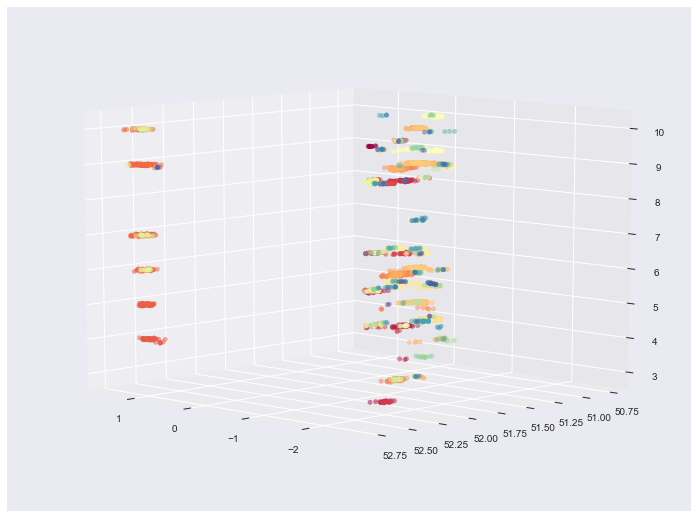

<Figure size 432x288 with 0 Axes>

In [695]:
unique_labels = np.unique(accidents.Cluster1)

map = fm.Map(location=[xmm,ymm], zoom_start=10)
ProducePostClusterPlots(unique_labels,accidents_with_relcount,"Cluster1","Month" )

Flatten variables then aggregate on cluster so that its possible to see what are the biggest influencers

(array(['Fatal', 'Serious', 'Slight'], dtype=object), array([  45,  783, 4084], dtype=int64))
(array(['Darkness - lighting unknown', 'Darkness - lights lit',
       'Darkness - lights unlit', 'Darkness - no lighting', 'Daylight'],
      dtype=object), array([  10,   66,   13,   17, 4806], dtype=int64))
(array(['Data missing or out of range', 'Dry', 'Flood over 3cm. deep',
       'Frost or ice', 'Wet or damp'], dtype=object), array([   1, 4169,    4,    5,  733], dtype=int64))
(array(['Dual carriageway', 'One way street', 'Roundabout',
       'Single carriageway', 'Slip road', 'Unknown'], dtype=object), array([ 490,  133,  410, 3795,   53,   31], dtype=int64))
(array(['20mph', '30mph', '40mph', '50mph', '60mph', '70mph'], dtype=object), array([ 484, 2979,  485,  201,  503,  260], dtype=int64))
(array(['Rural', 'Urban'], dtype=object), array([1509, 3403], dtype=int64))
(array(['Fine + high winds', 'Fine no high winds', 'Fog or mist', 'Other',
       'Raining + high winds', 'Raining no hi

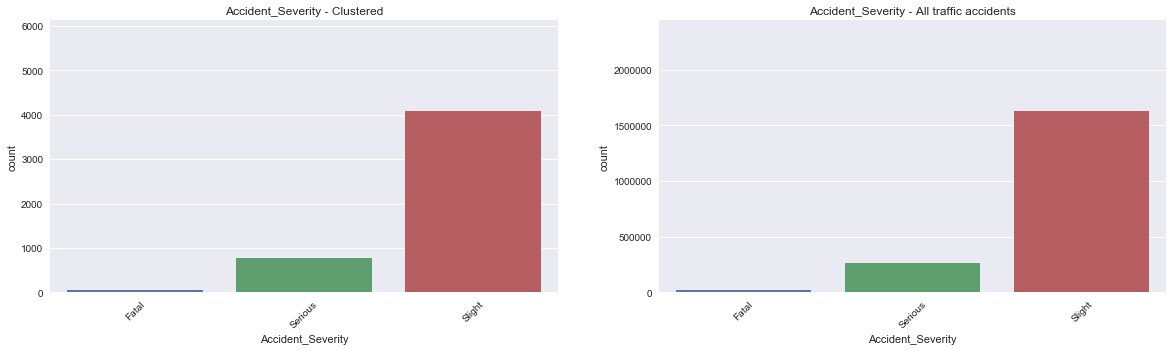

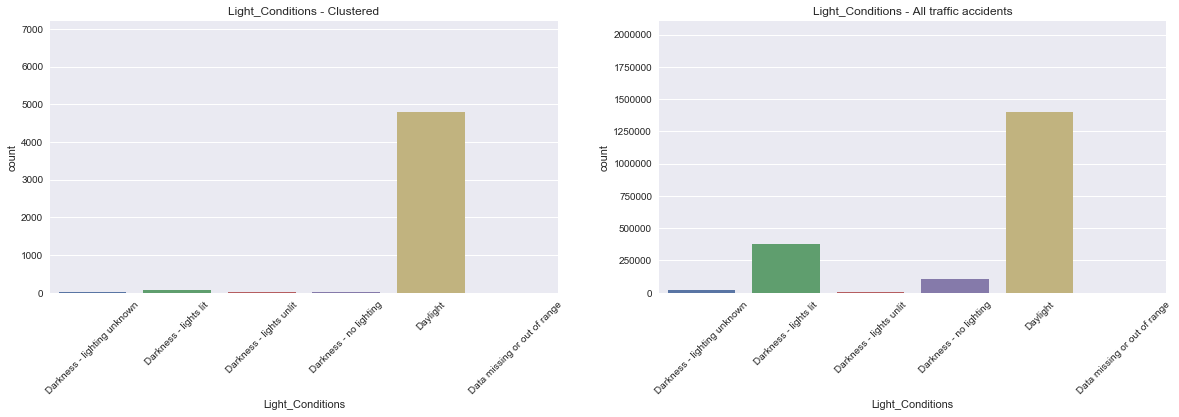

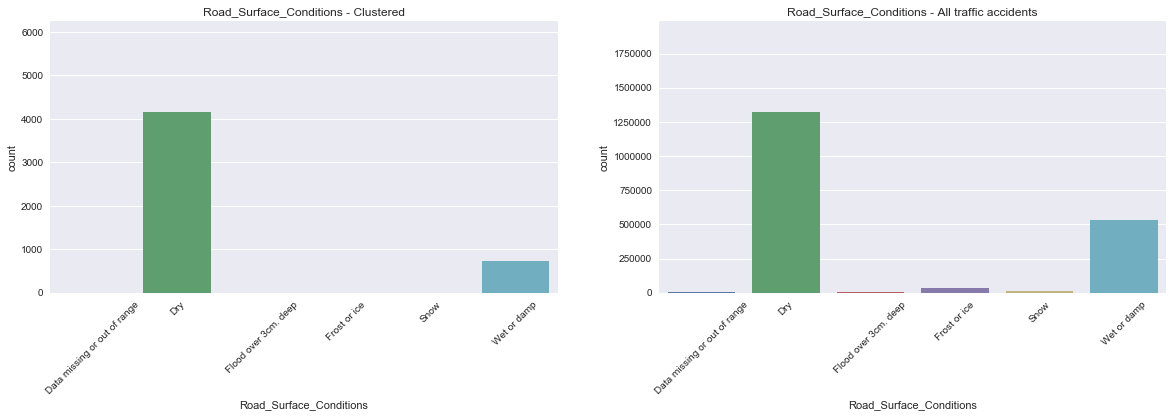

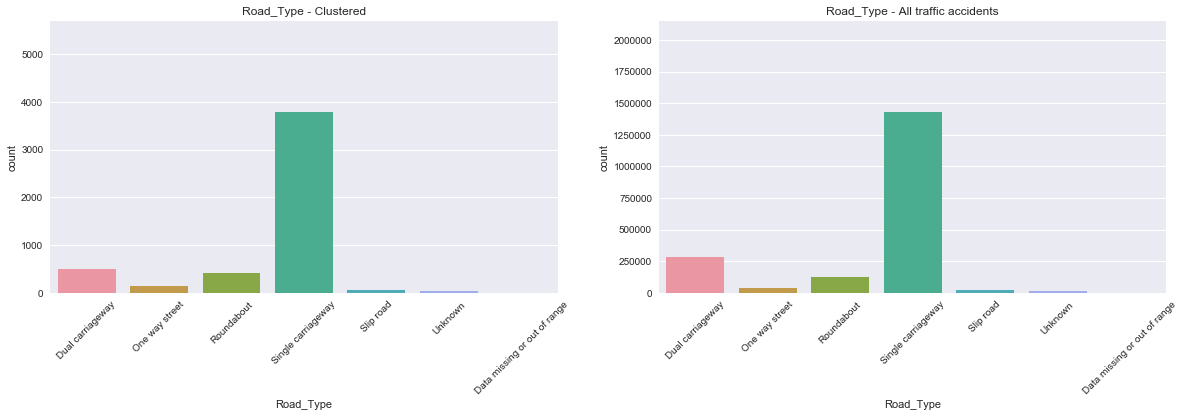

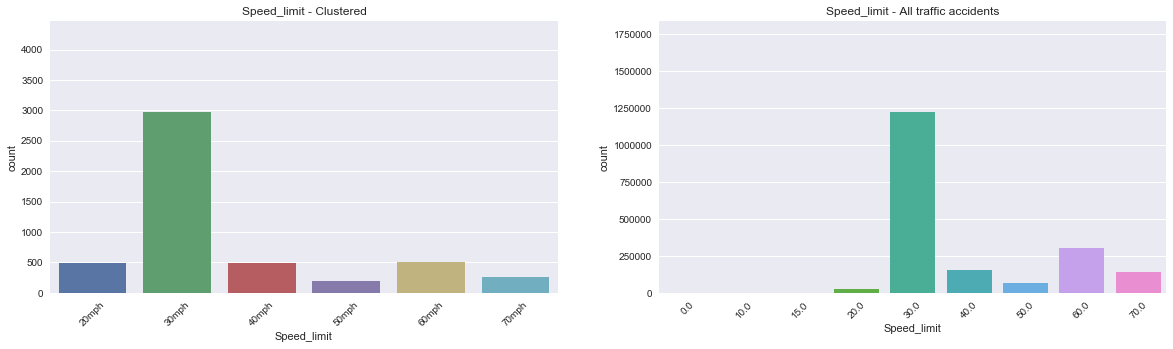

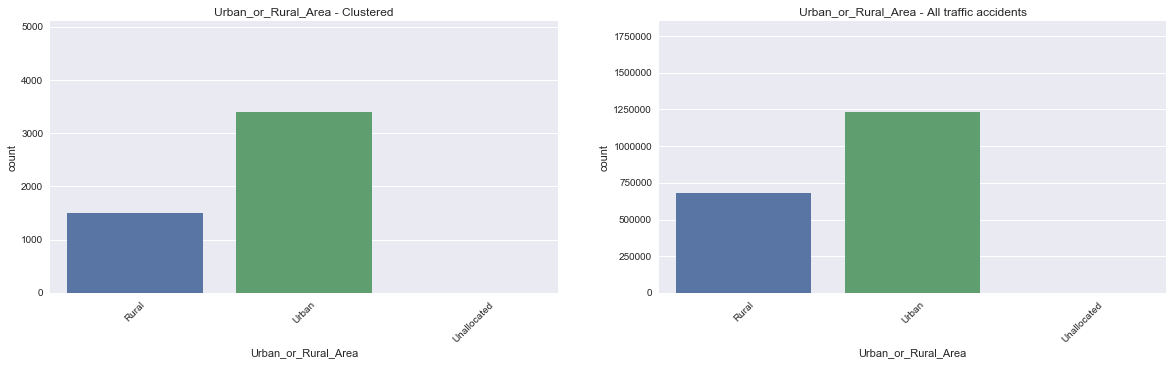

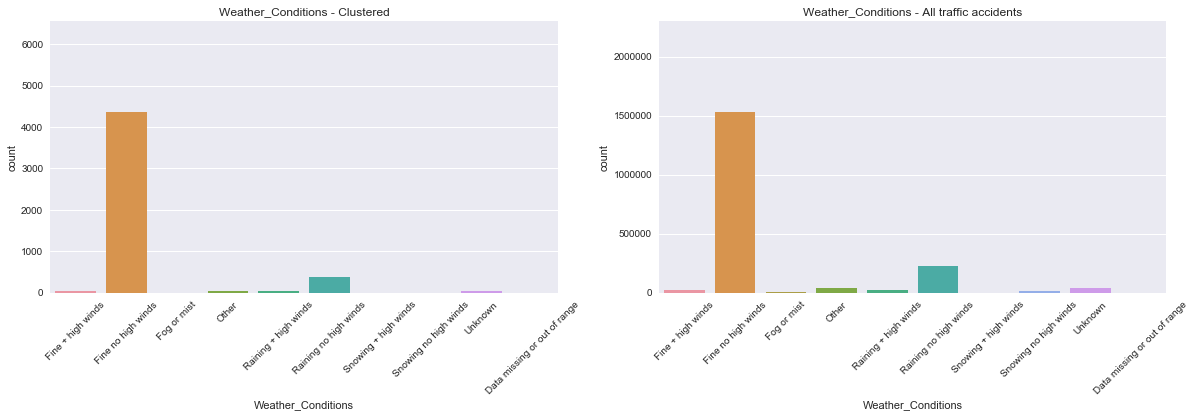

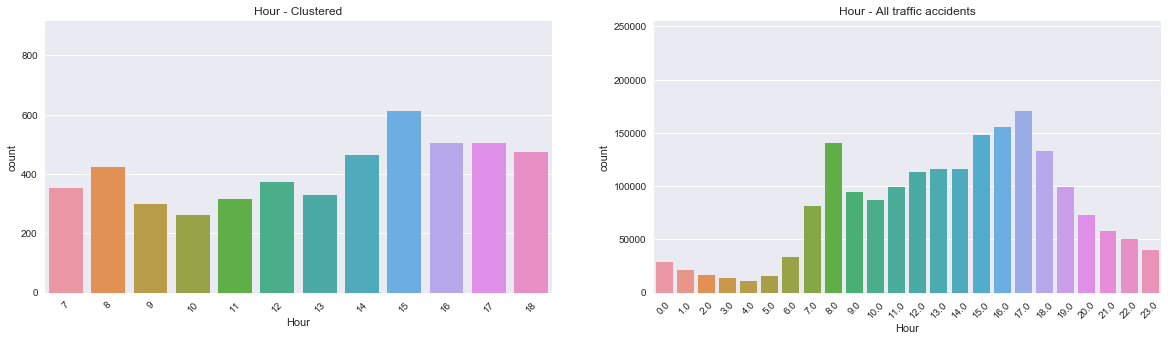

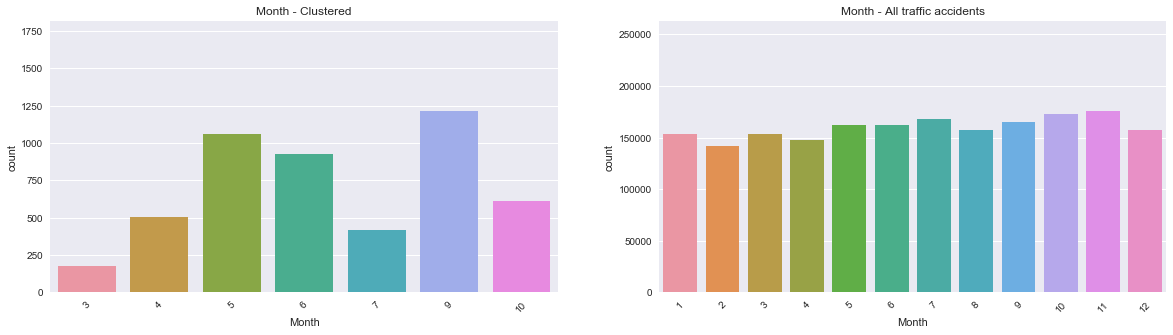

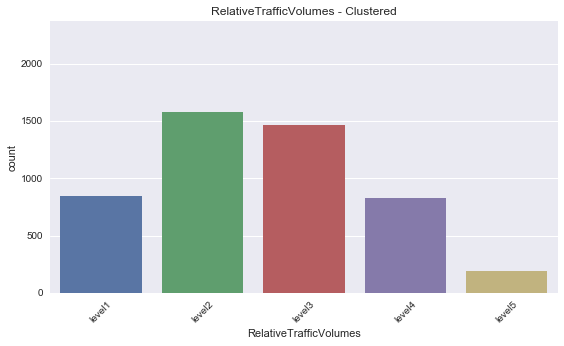

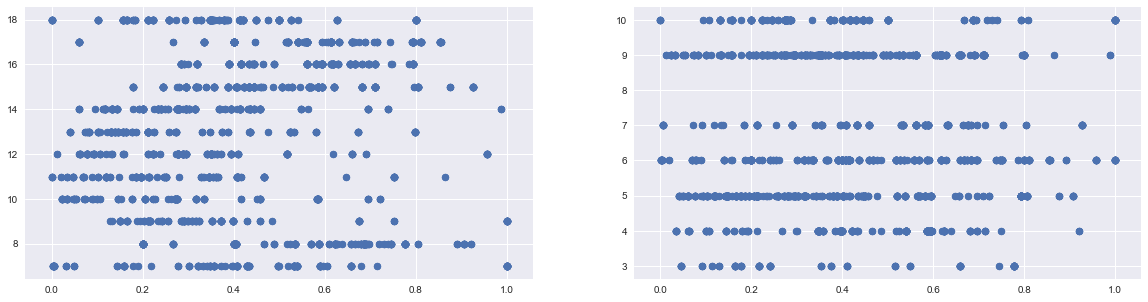

In [444]:
# set the relative traffic volumes as a categorical
accidents_with_relcount.loc[:,"RelativeTrafficVolumes"] = pd.cut(accidents_with_relcount["AMVR_mean"],bins=5,labels=["level1","level2","level3","level4","level5"])
#accidents_with_relcount.loc[:,"Speed_limit"] = pd.cut(accidents_with_relcount["Speed_limit"],bins=6,labels=["20mph","30mph","40mph","50mph","60mph","70mph"])

#["Accident_Severity","Light_Conditions", \
#"Road_Surface_Conditions","Road_Type","Speed_limit","Urban_or_Rural_Area", \
#"Weather_Conditions","Year","MonthCount","Month","Hour","Cluster1","AMVR_mean","RelativeTrafficVolumes"]
trafficAccidents["Hour"] = trafficAccidents["Time"].apply(lambda x: x.hour)
trafficAccidents["Month"] = trafficAccidents["Date"].apply(lambda x: x.month)

variables = ["Accident_Severity","Light_Conditions","Road_Surface_Conditions","Road_Type", \
             "Speed_limit","Urban_or_Rural_Area","Weather_Conditions","Hour", "Month","RelativeTrafficVolumes"]


for idx,col in enumerate(variables):
    
    print(np.unique(accidents_with_relcount[col],return_counts=True))
    if (col != "Hour") & (col != "Month"):
        accidents_with_relcount[col].cat.remove_unused_categories()
    
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    countplot(accidents_with_relcount[col])
    # You can specify a rotation for the tick labels in degrees or with keywords.
    plt.xticks(rotation='45')
    plt.margins(0.5)
    plt.title("%s - Clustered" % (col))
    
    if col != "RelativeTrafficVolumes":
        plt.subplot(1,2,2)
        countplot(trafficAccidents[col])
        # You can specify a rotation for the tick labels in degrees or with keywords.
        plt.xticks(rotation='45')
        plt.margins(0.5)
        plt.title("%s - All traffic accidents" % (col))

    
plt.savefig(REPORTS_DIR + "VariableComparison.png")


plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.scatter(accidents_with_relcount["AMVR_mean"], accidents_with_relcount["Hour"])
plt.subplot(1,2,2)
plt.scatter(accidents_with_relcount["AMVR_mean"], accidents_with_relcount["Month"])

In [555]:
variables = ["Accident_Severity","Light_Conditions","Road_Surface_Conditions","Road_Type", \
             "Speed_limit","Urban_or_Rural_Area","Weather_Conditions", \
             "Date","Time","Cluster1","Cluster2","AMV_mean","AMVR_mean"]
accidents_exploded = pd.concat([accidents_with_relcount[["Accident_Index","town"]], pd.get_dummies(accidents_with_relcount[variables])],axis=1)
accidents_exploded.info()

d1 = accidents_exploded.groupby(["Cluster1"])["Date","Time"].agg(["min"])
d1.columns=["Date_min","Time_min"]
d2 = accidents_exploded.groupby(["Cluster1"])["Date","Time"].agg(["max"])
d2.columns=["Date_max","Time_max"]

t = accidents_exploded.groupby(["Cluster1"])["town"].min()

x = accidents_exploded.groupby(["Cluster1"])["Accident_Severity_Fatal", \
"Accident_Severity_Serious", \
"Accident_Severity_Slight", \
"Light_Conditions_Darkness - lighting unknown", \
"Light_Conditions_Darkness - lights lit", \
"Light_Conditions_Darkness - lights unlit", \
"Light_Conditions_Darkness - no lighting", \
"Light_Conditions_Daylight", \
"Light_Conditions_Data missing or out of range", \
"Road_Surface_Conditions_Data missing or out of range", \
"Road_Surface_Conditions_Dry", \
"Road_Surface_Conditions_Flood over 3cm. deep", \
"Road_Surface_Conditions_Frost or ice", \
"Road_Surface_Conditions_Snow", \
"Road_Surface_Conditions_Wet or damp", \
"Road_Type_Dual carriageway", \
"Road_Type_One way street", \
"Road_Type_Roundabout", \
"Road_Type_Single carriageway", \
"Road_Type_Slip road", \
"Road_Type_Unknown", \
"Road_Type_Data missing or out of range", \
"Urban_or_Rural_Area_Rural", \
"Urban_or_Rural_Area_Urban", \
"Urban_or_Rural_Area_Unallocated", \
"Weather_Conditions_Fine + high winds", \
"Weather_Conditions_Fine no high winds", \
"Weather_Conditions_Fog or mist", \
"Weather_Conditions_Other", \
"Weather_Conditions_Raining + high winds", \
"Weather_Conditions_Raining no high winds", \
"Weather_Conditions_Snowing + high winds", \
"Weather_Conditions_Snowing no high winds", \
"Weather_Conditions_Unknown", \
"Weather_Conditions_Data missing or out of range"].sum()

y = accidents_exploded.groupby(["Cluster1"])["AMV_mean", "AMVR_mean"].mean()

z = accidents_exploded.groupby(["Cluster1"])["Accident_Index"].count()

accidents_aggr = pd.concat([z,t,d1,d2,y,x],axis=1)
accidents_aggr.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4912 entries, 0 to 4911
Data columns (total 44 columns):
Accident_Index                                          4912 non-null object
town                                                    4912 non-null object
Speed_limit                                             4912 non-null float64
Date                                                    4912 non-null datetime64[ns]
Time                                                    4912 non-null datetime64[ns]
Cluster1                                                4912 non-null int64
Cluster2                                                4912 non-null int64
AMV_mean                                                4912 non-null float64
AMVR_mean                                               4912 non-null float64
Accident_Severity_Fatal                                 4912 non-null uint8
Accident_Severity_Serious                               4912 non-null uint8
Accident_Severity_Slight       

,Accident_Index,town,Date_min,Time_min,Date_max,Time_max,AMV_mean,AMVR_mean,Accident_Severity_Fatal,Accident_Severity_Serious,...,Weather_Conditions_Fine + high winds,Weather_Conditions_Fine no high winds,Weather_Conditions_Fog or mist,Weather_Conditions_Other,Weather_Conditions_Raining + high winds,Weather_Conditions_Raining no high winds,Weather_Conditions_Snowing + high winds,Weather_Conditions_Snowing no high winds,Weather_Conditions_Unknown,Weather_Conditions_Data missing or out of range
Cluster1,,,,,,,,,,,,,,,,,,,,,
12,8,"Bath Road area, Worchester",2010-10-03,2018-12-20 11:00:00,2014-10-07,2018-12-20 11:58:00,578.000000,0.000000,0,1,...,0,6,0,0,1,1,0,0,0,0
13,3,"Bath Road area, Worchester",2010-10-06,2018-12-20 08:00:00,2014-10-06,2018-12-20 08:55:00,1086.500000,0.739099,0,1,...,0,0,0,0,0,2,0,0,1,0
14,2,"Bath Road area, Worchester",2010-10-06,2018-12-20 14:30:00,2011-10-19,2018-12-20 14:45:00,643.000000,0.094477,0,0,...,0,2,0,0,0,0,0,0,0,0
16,7,"Bath Road area, Worchester",2010-03-29,2018-12-20 12:00:00,2014-03-10,2018-12-20 12:58:00,514.500000,0.353586,0,2,...,0,6,0,0,0,1,0,0,0,0
27,8,"Bath Road area, Worchester",2010-06-14,2018-12-20 09:00:00,2016-06-12,2018-12-20 09:45:00,2325.666667,0.241760,0,2,...,0,8,0,0,0,0,0,0,0,0


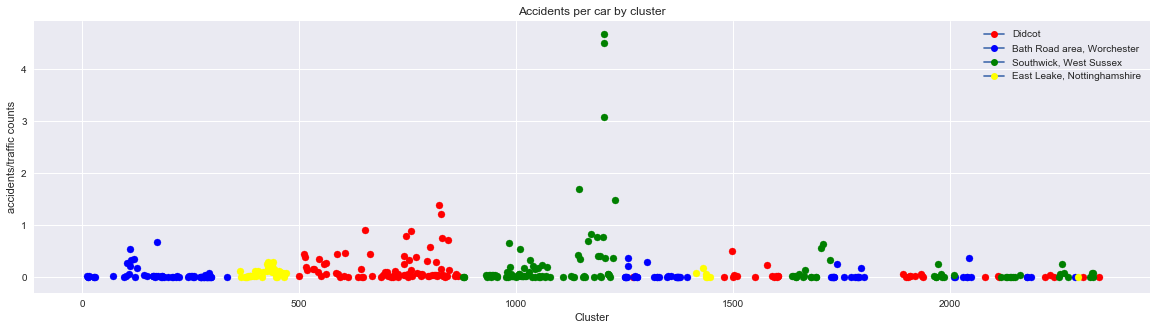

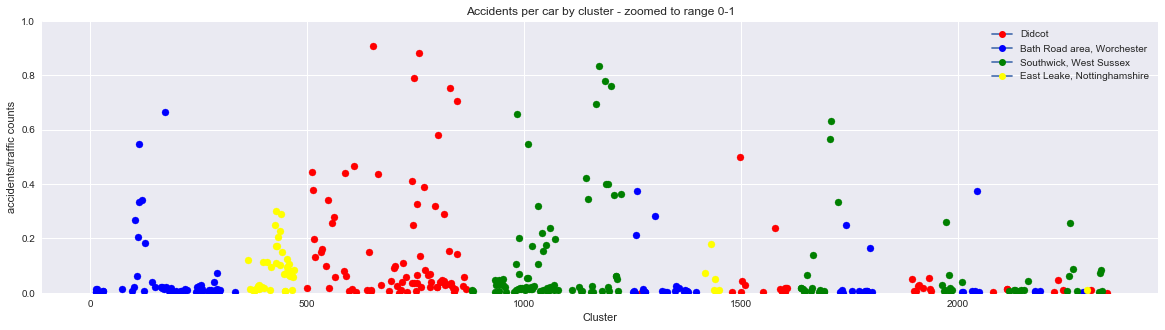

In [536]:
f, ax = plt.subplots(figsize=(20,5))
for town in normalTowns:
    data = accidents_aggr[accidents_aggr["town"] == town["name"]]
    plt.scatter(data.index, np.divide(data["Accident_Index"], data["AMV_mean"]),c=town["color"])
    plt.xlabel("Cluster")
    plt.ylabel("accidents/traffic counts")
    plt.title("Accidents per car by cluster")
    

legend_elements = [Line2D([0], [0], marker='o', label=normalTowns[0]['name'], markerfacecolor=normalTowns[0]['color']),
               Line2D([0], [0], marker='o', label=normalTowns[1]['name'], markerfacecolor=normalTowns[1]['color']),
               Line2D([0], [0], marker='o', label=normalTowns[2]['name'], markerfacecolor=normalTowns[2]['color']),
               Line2D([0], [0], marker='o', label=normalTowns[3]['name'], markerfacecolor=normalTowns[3]['color'])]
ax.legend(handles=legend_elements)

f, ax = plt.subplots(figsize=(20,5))
for town in normalTowns:
    data = accidents_aggr[accidents_aggr["town"] == town["name"]]
    plt.scatter(data.index, np.divide(data["Accident_Index"], data["AMV_mean"]),c=town["color"])
    plt.xlabel("Cluster")
    plt.ylabel("accidents/traffic counts")
    plt.title("Accidents per car by cluster - zoomed to range 0-1")
    plt.ylim(0,1)

legend_elements = [Line2D([0], [0], marker='o', label=normalTowns[0]['name'], markerfacecolor=normalTowns[0]['color']),
               Line2D([0], [0], marker='o', label=normalTowns[1]['name'], markerfacecolor=normalTowns[1]['color']),
               Line2D([0], [0], marker='o', label=normalTowns[2]['name'], markerfacecolor=normalTowns[2]['color']),
               Line2D([0], [0], marker='o', label=normalTowns[3]['name'], markerfacecolor=normalTowns[3]['color'])]
ax.legend(handles=legend_elements)

Now lets split these clusters into 3 groups and check for seasonality i.e. month and see which features are common against that

(array(['high', 'low', 'medium'], dtype=object), array([ 19, 308,  76], dtype=int64))


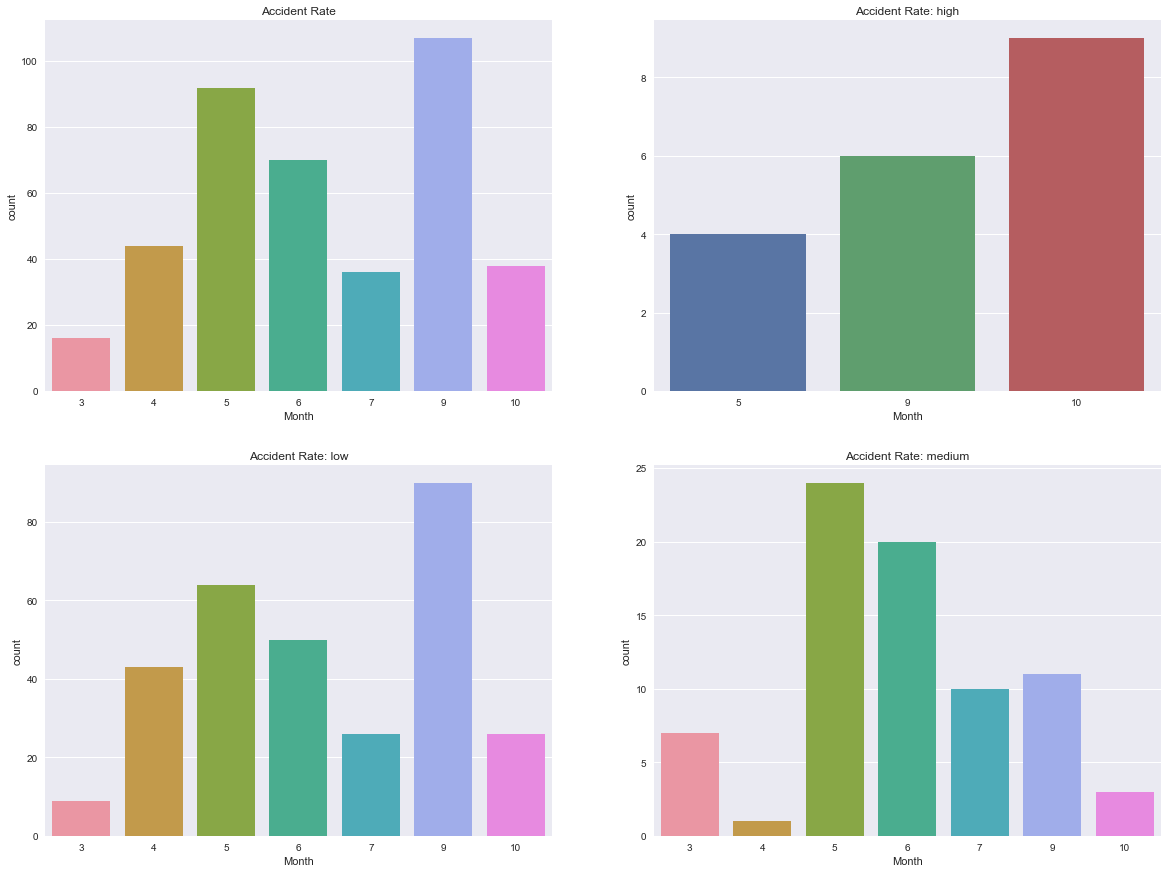

In [571]:
accidents_aggr.loc[:,"AccidentRateGroup"] = pd.cut(np.divide(accidents_aggr["Accident_Index"], accidents_aggr["AMV_mean"]), \
                                                   bins=[0,0.1,0.6,10],labels=['low','medium','high'])
print(np.unique(accidents_aggr["AccidentRateGroup"], return_counts=True))
accidents_aggr.loc[:,"Month"] = accidents_aggr["Date_min"].apply(lambda x: x.month)

plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
countplot(accidents_aggr["Month"])
plt.title("Accident Rate")

i = 2
for y in np.unique(accidents_aggr["AccidentRateGroup"]):
    data = accidents_aggr[accidents_aggr["AccidentRateGroup"]==y]
    plt.subplot(2,2,i)
    countplot(data["Month"])
    plt.title("Accident Rate: %s" % (y))
    i = i + 1
    
plt.savefig(REPORTS_DIR + "accident_aggregates_by_month")

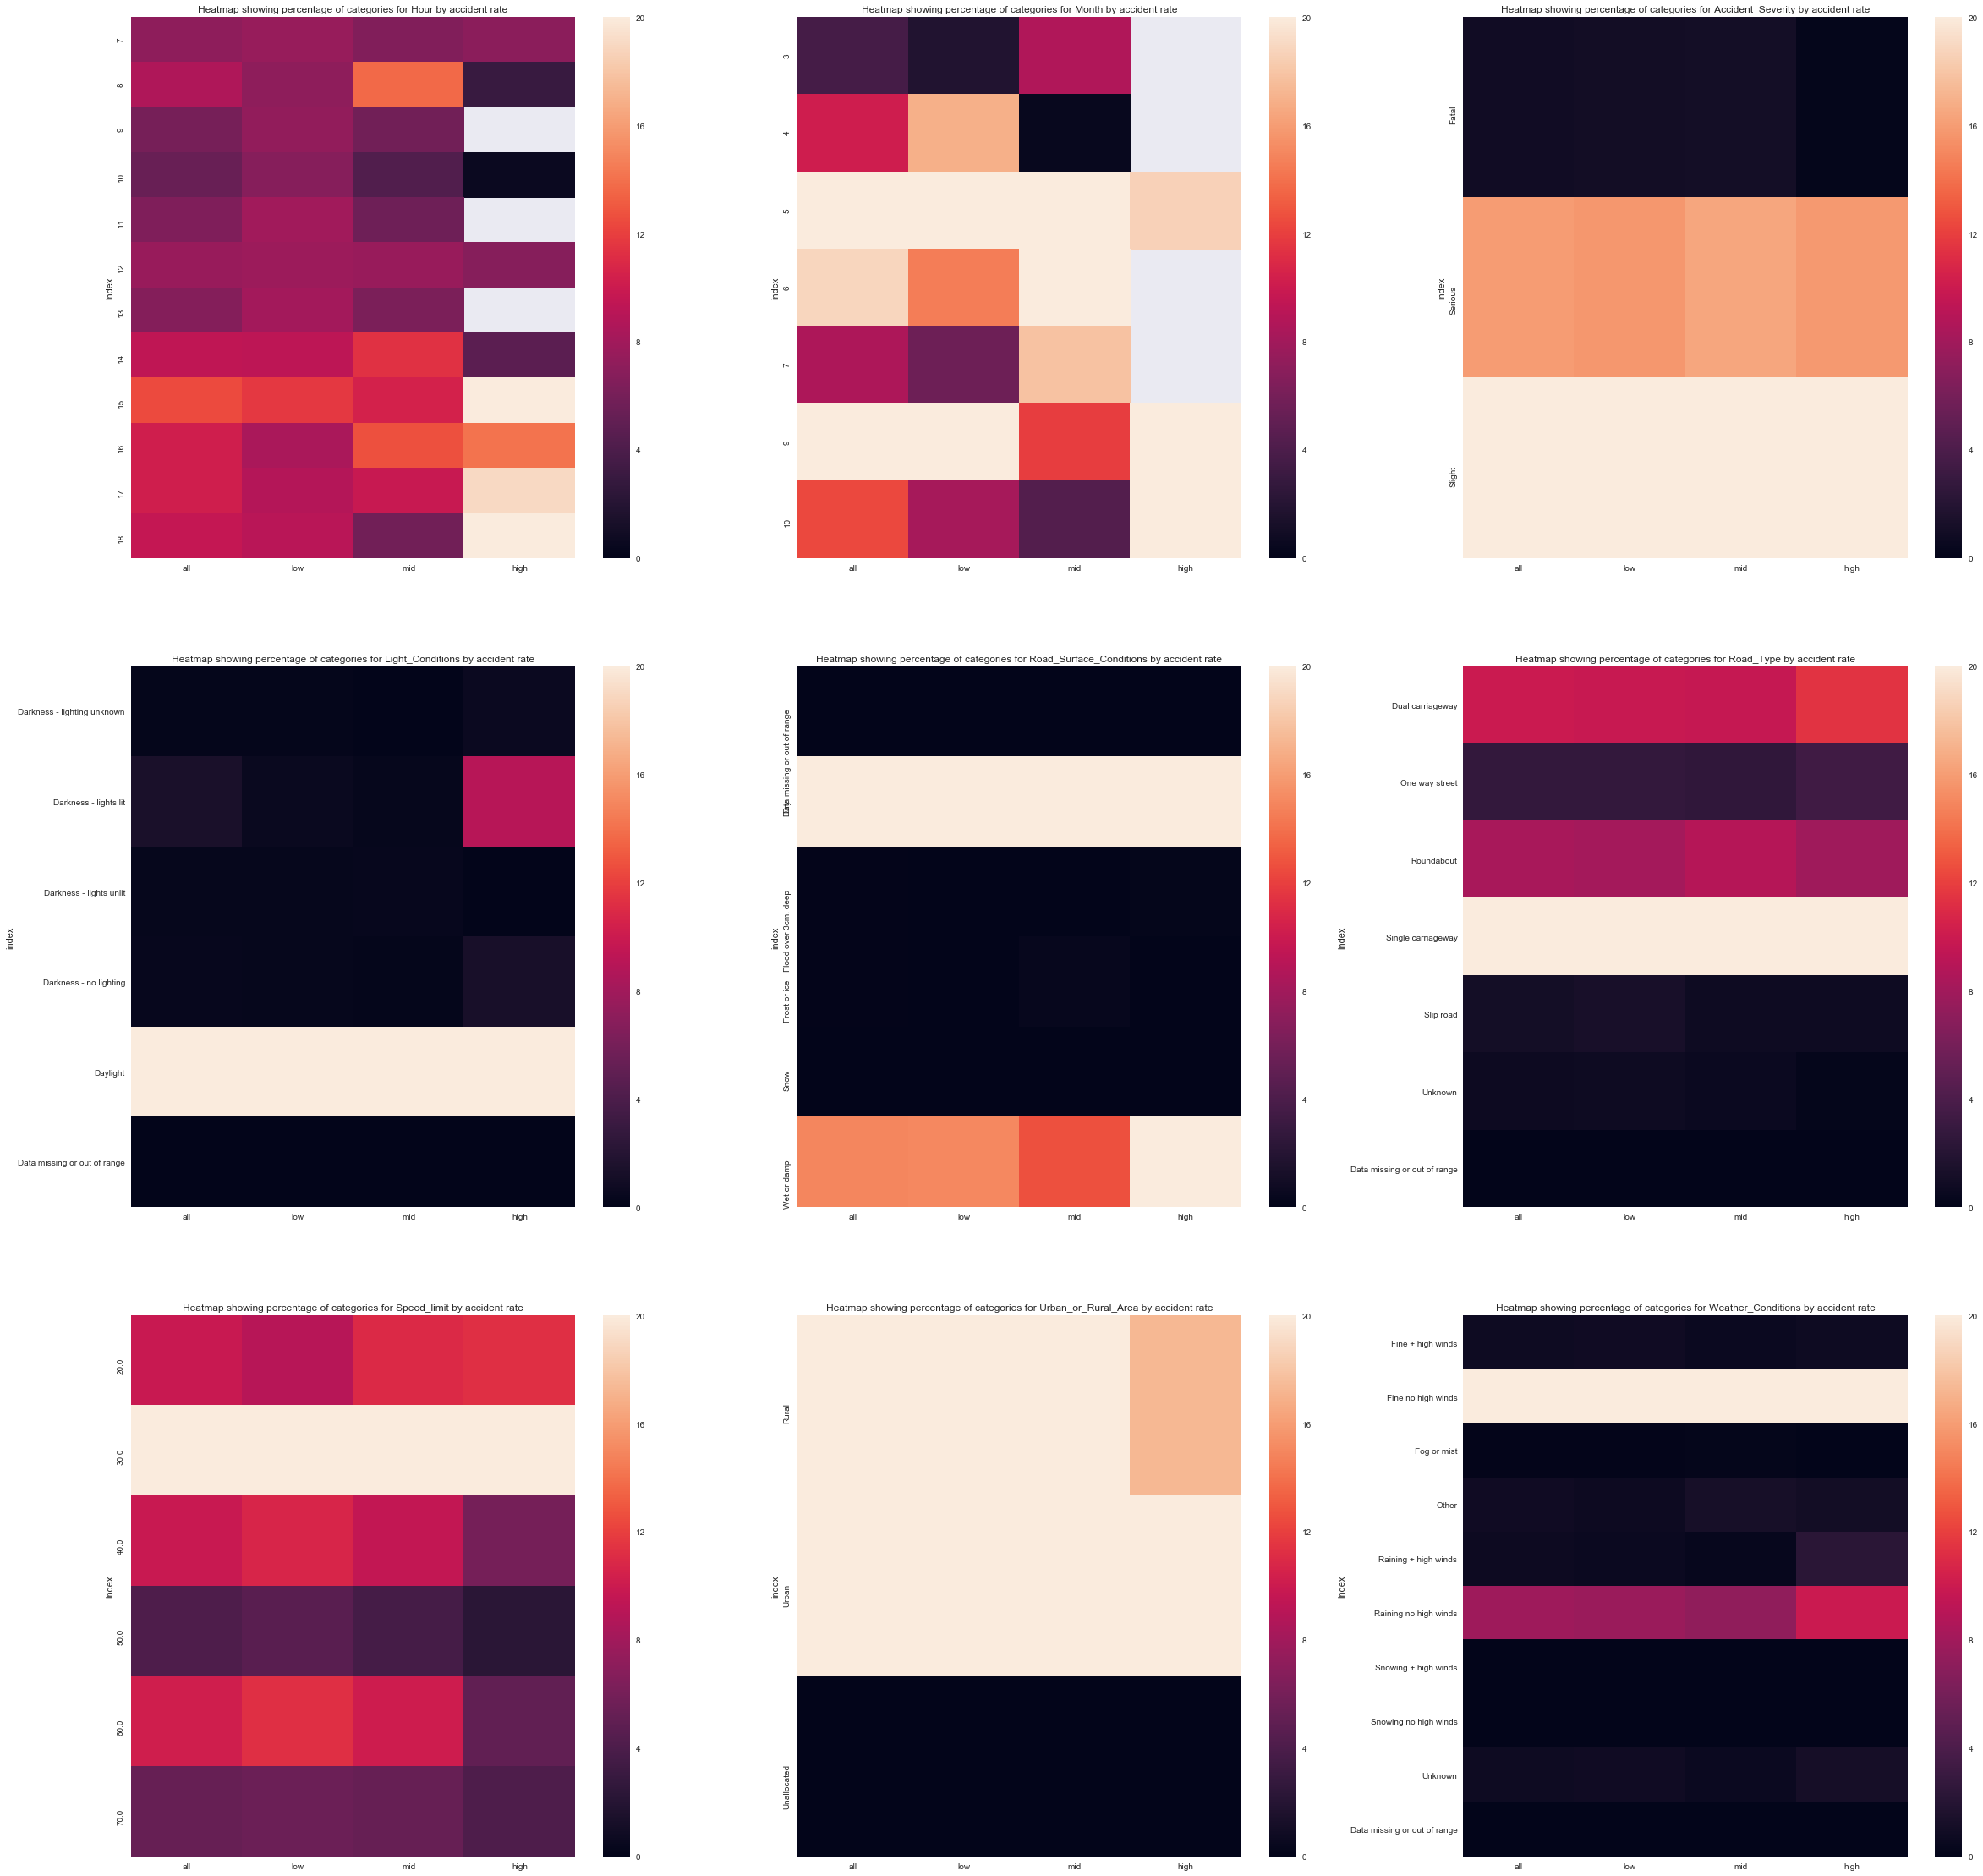

In [643]:
from seaborn import barplot

# Push back so we can review the counts for each attribute
accidents_with_rategroup = accidents_with_relcount.merge(pd.DataFrame(accidents_aggr["AccidentRateGroup"]),left_on="Cluster1", right_on="Cluster1")

variables = ["Hour", "Month", "Accident_Severity","Light_Conditions","Road_Surface_Conditions","Road_Type", \
             "Speed_limit","Urban_or_Rural_Area","Weather_Conditions"]

big_categories = ["","","","Daylight","Dry","Single carriageway",30.0,"","Fine no high winds"]


reduce_big_cats = False

plt.figure(figsize=(40,40))
for idx,col in enumerate(variables):
    
    if (big_categories[idx] != "") & (reduce_big_cats == True):
        tmp_accidents = accidents_with_rategroup[accidents_with_rategroup[col] != big_categories[idx]]
    else:
        tmp_accidents = accidents_with_rategroup
    
    all = pd.DataFrame(tmp_accidents[col].value_counts(normalize=True, sort=False)*100)
    all.index.name="index"
    low = pd.DataFrame(tmp_accidents[tmp_accidents["AccidentRateGroup"] == "low"][col].value_counts(normalize=True, sort=False)*100)
    low.index.name="index"
    data = all.merge(low,how="left", left_on="index",right_on="index")

    mid = pd.DataFrame(tmp_accidents[tmp_accidents["AccidentRateGroup"] == "medium"][col].value_counts(normalize=True, sort=False)*100)
    mid.index.name="index"
    data = data.merge(mid,how="left", left_on="index",right_on="index")

    hi = pd.DataFrame(tmp_accidents[tmp_accidents["AccidentRateGroup"] == "high"][col].value_counts(normalize=True, sort=False)*100)
    hi.index.name="index"
    data = data.merge(hi,how="left", left_on="index",right_on="index")

    data.columns=["all","low","mid","high"]
    plt.subplot(3,3,idx+1)
    ax = sns.heatmap(data.sort_index(),vmin=0,vmax=20)
    plt.title("Heatmap showing percentage of categories for %s by accident rate" % (col))
    
plt.savefig(REPORTS_DIR + "AttributeHeatMaps_by_accidentrate_" +str(reduce_big_cats)+ ".png")

In [677]:
import prince



accidents_with_rategroup["Month"] = accidents_with_rategroup["Month"].astype(str)
accidents_with_rategroup["Hour"] = accidents_with_rategroup["Hour"].astype(str)
accidents_with_rategroup["Speed_limit"] = accidents_with_rategroup["Hour"].astype(str)




C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


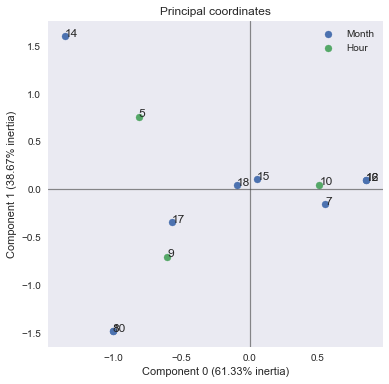

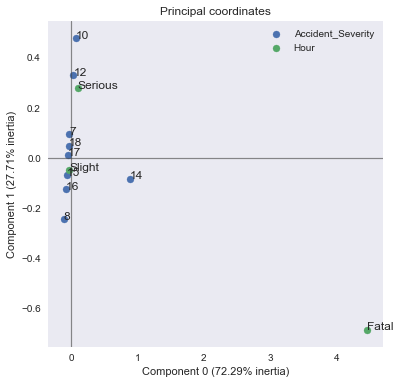

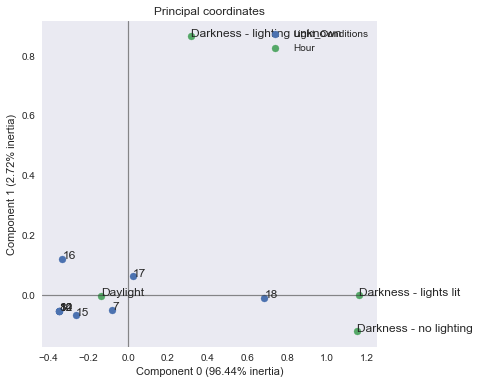

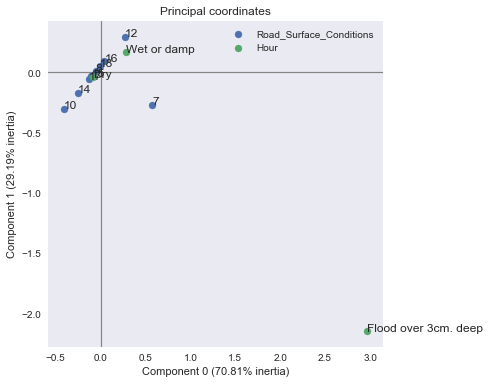

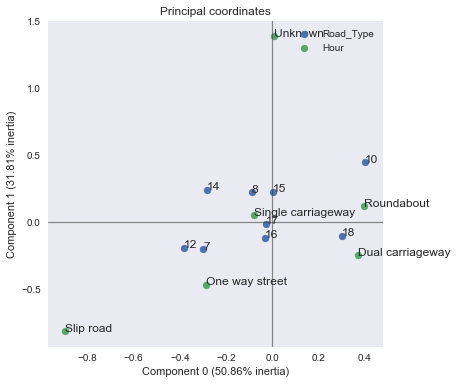

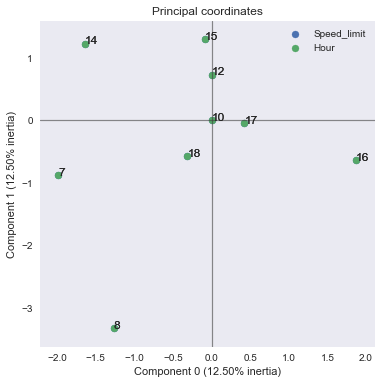

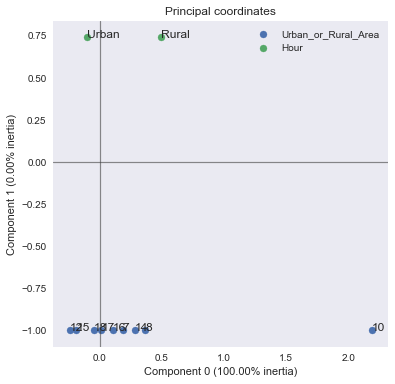

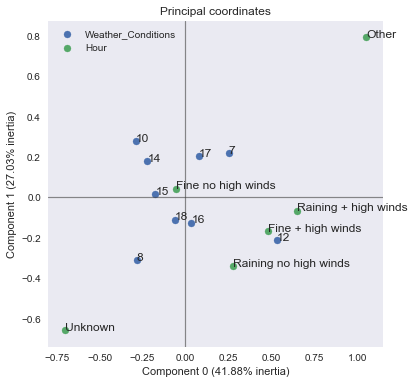

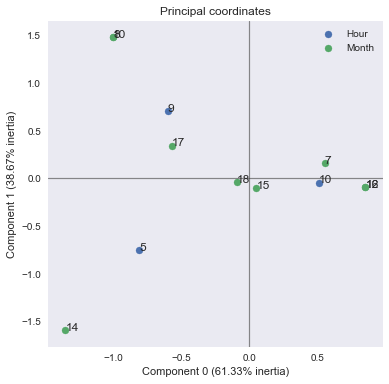

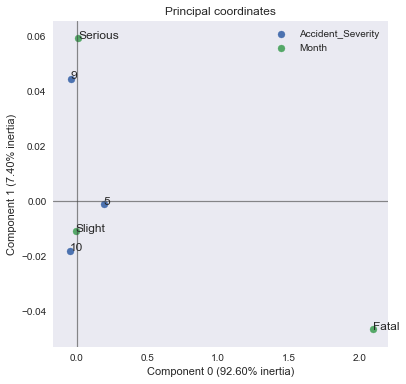

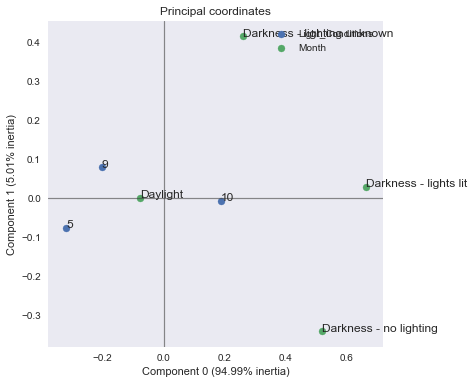

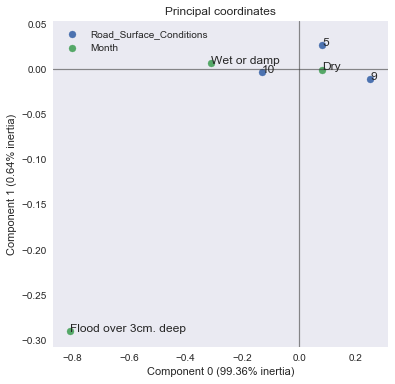

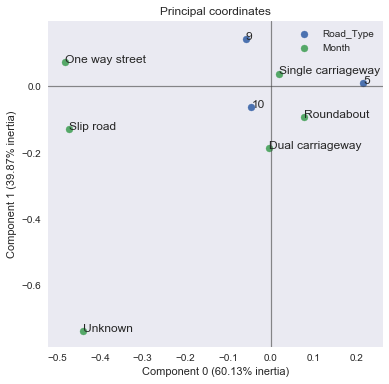

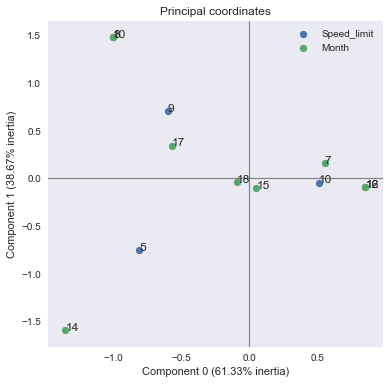

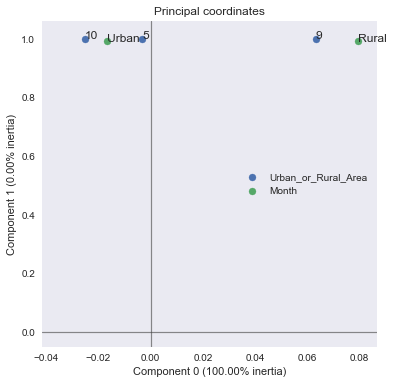

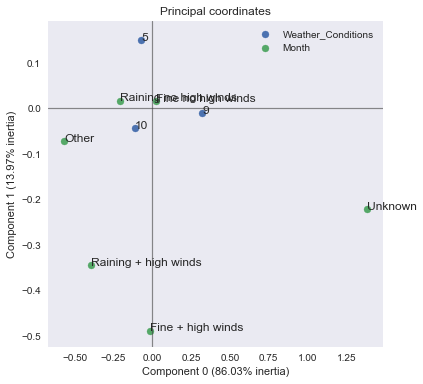

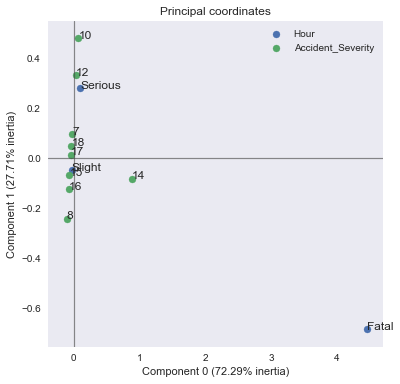

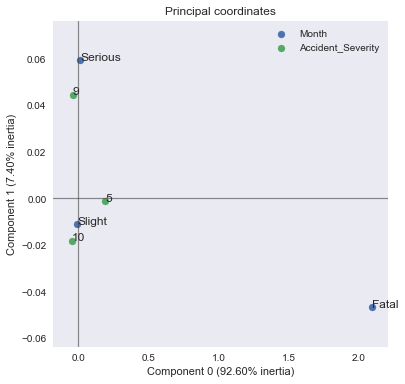

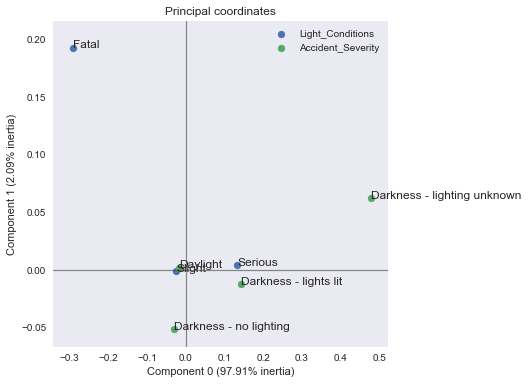

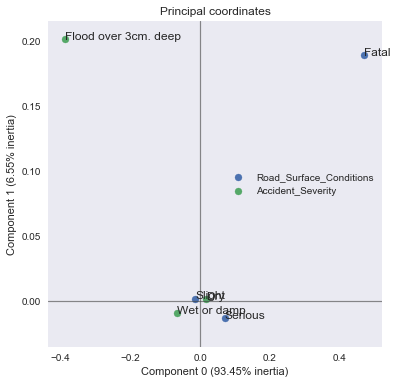

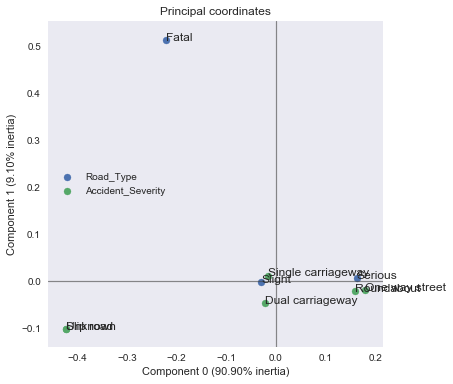

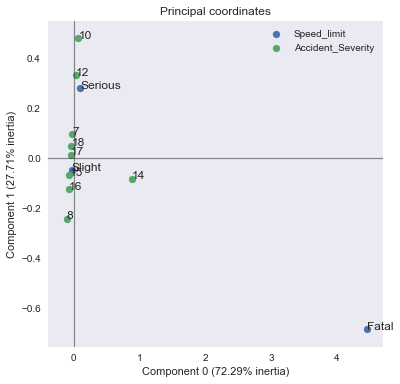

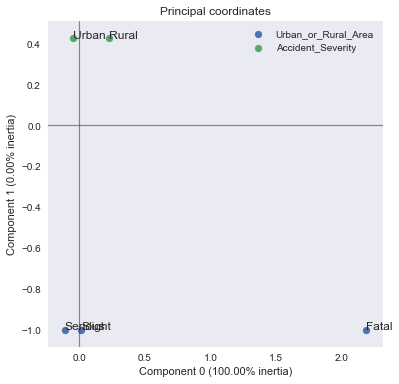

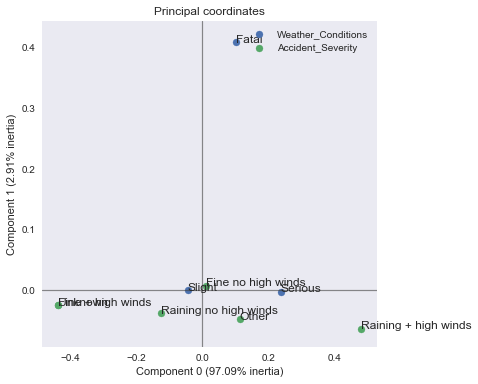

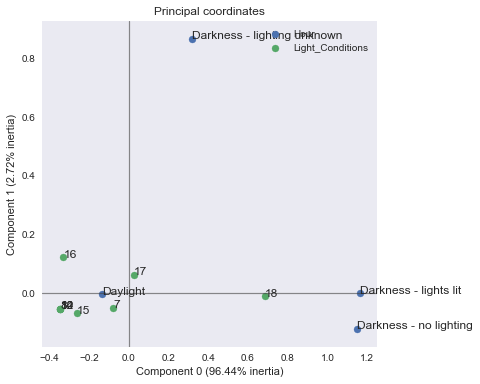

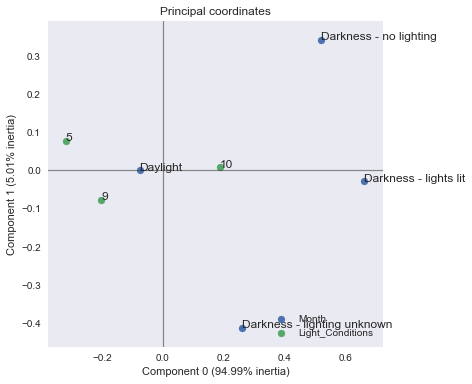

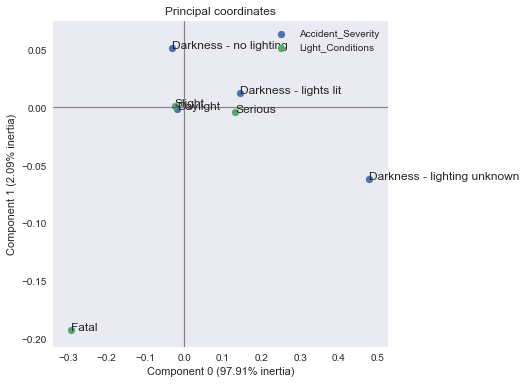

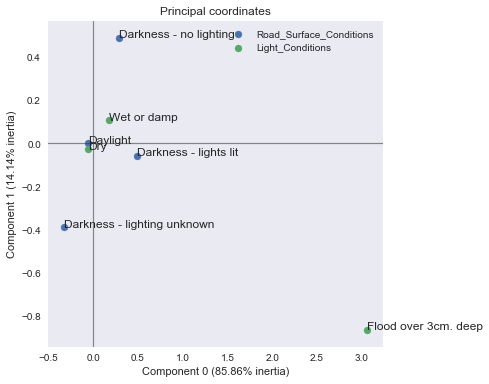

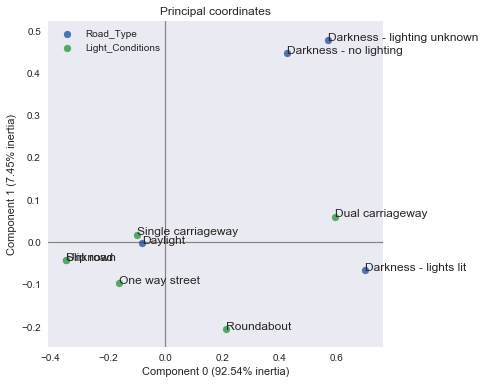

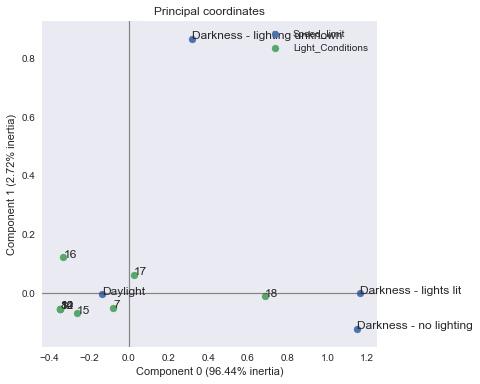

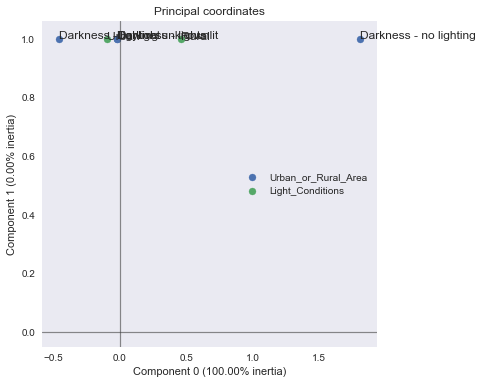

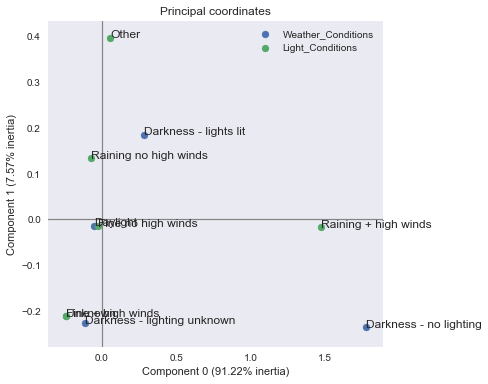

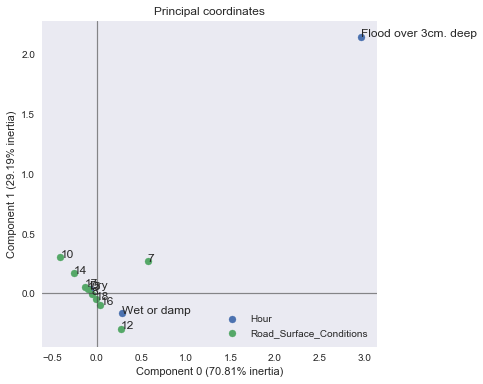

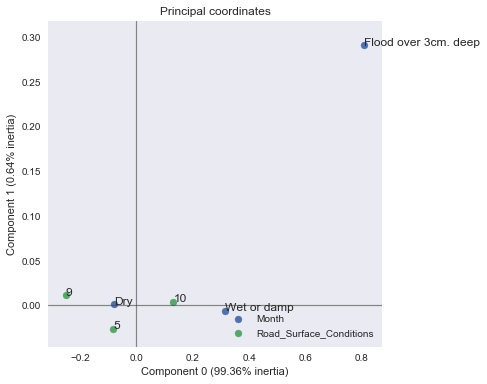

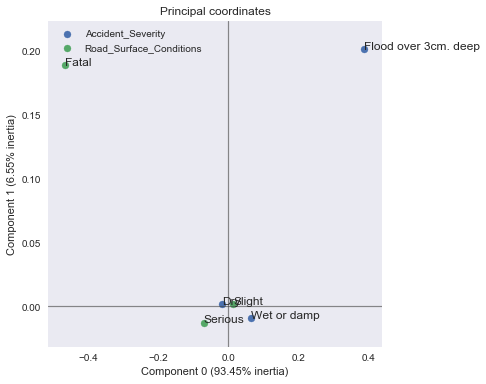

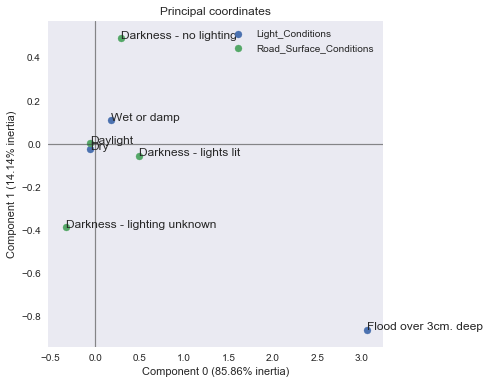

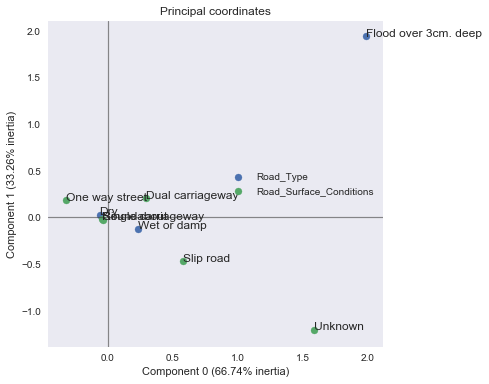

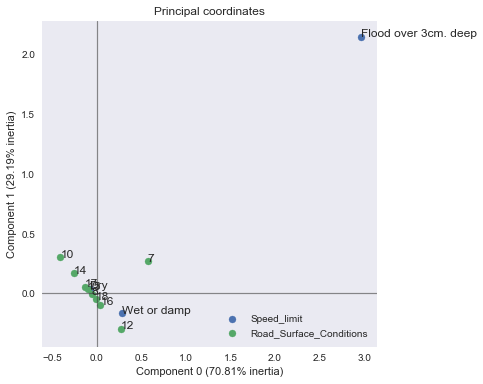

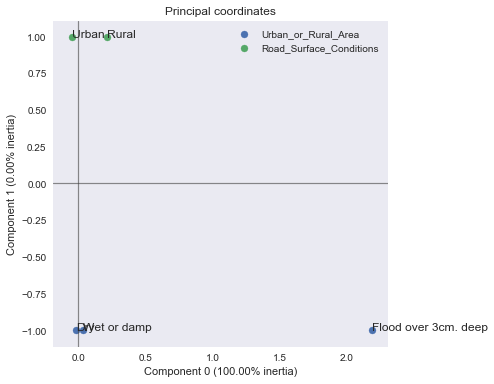

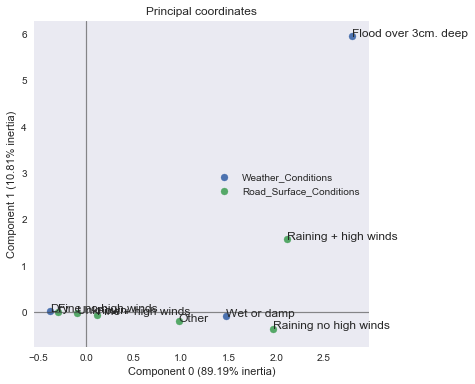

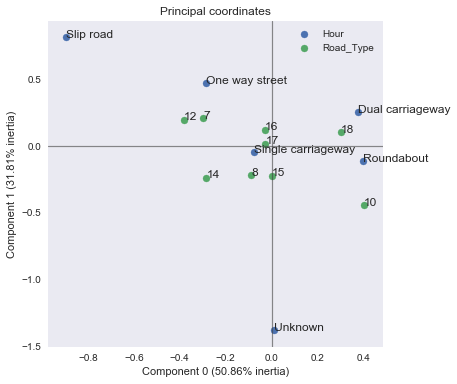

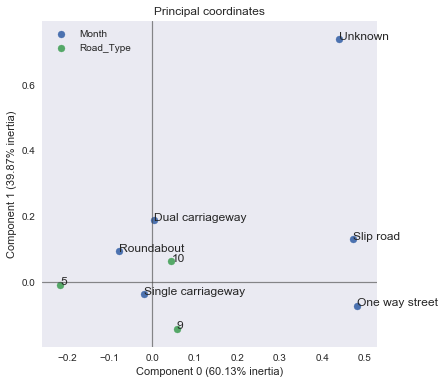

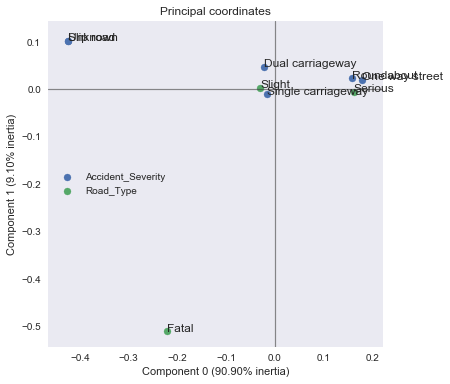

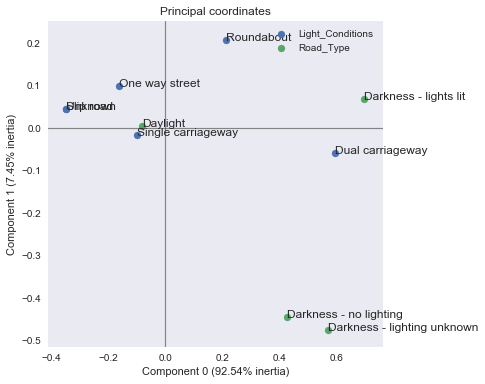

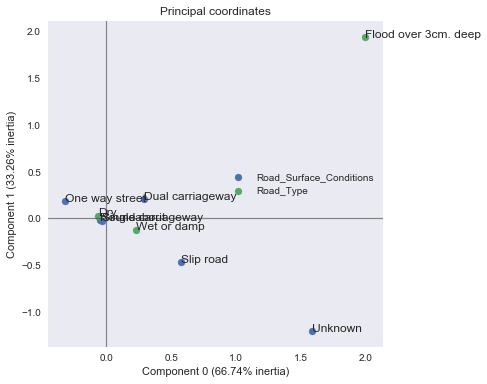

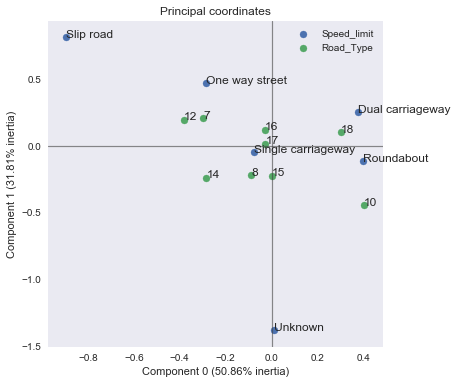

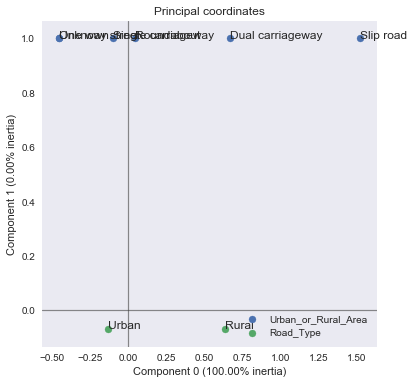

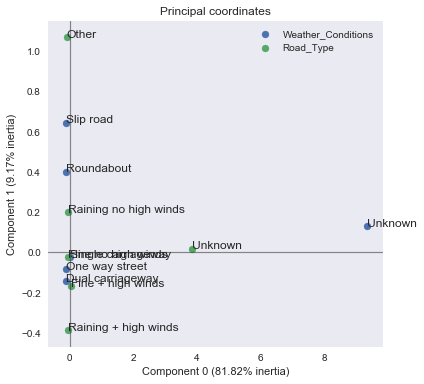

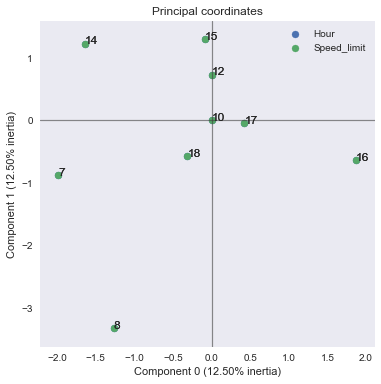

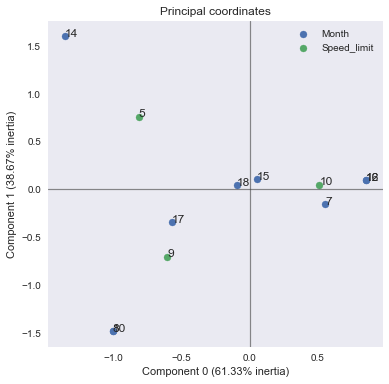

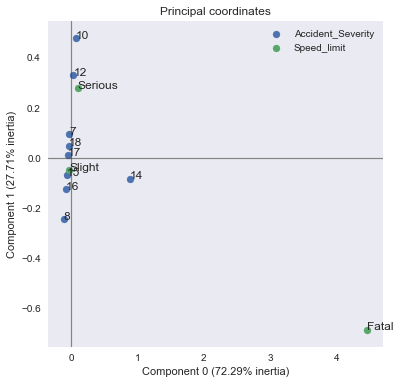

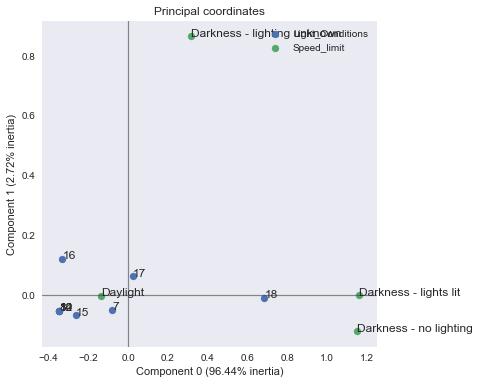

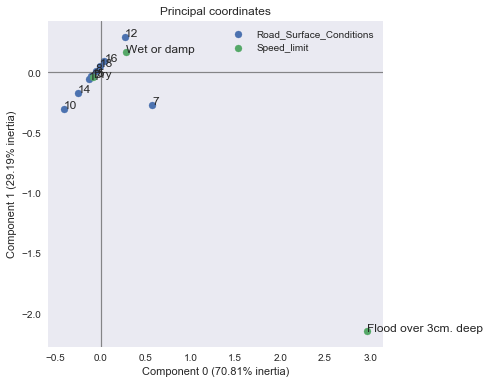

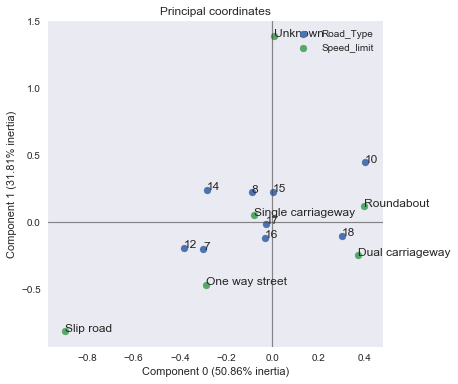

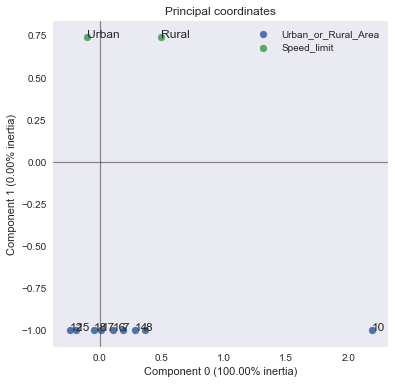

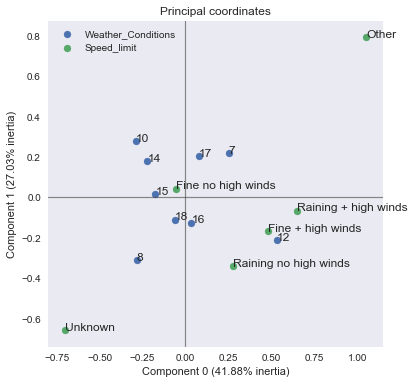

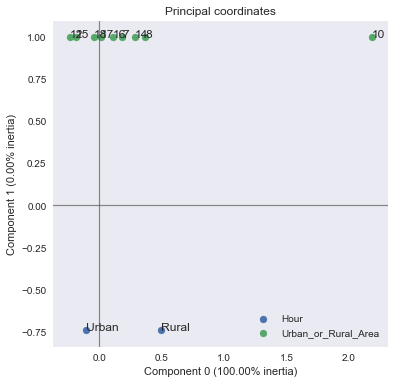

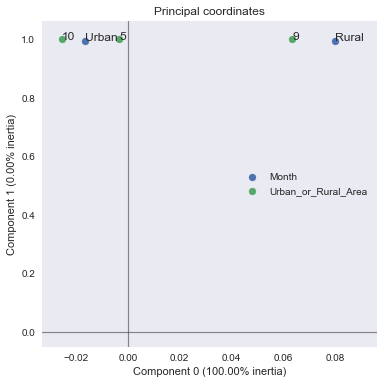

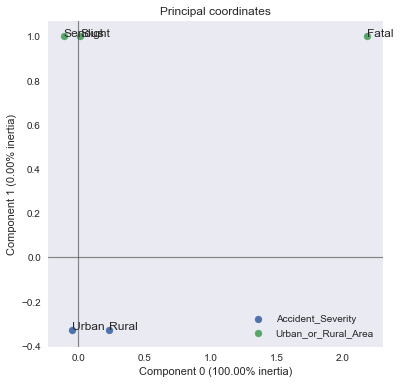

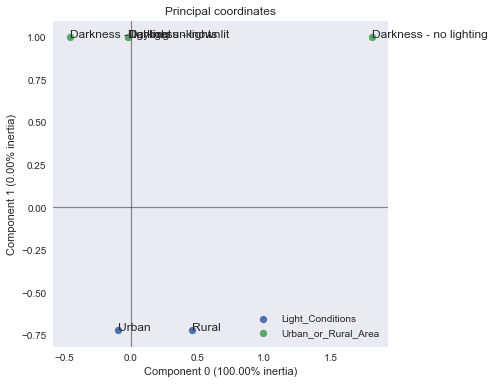

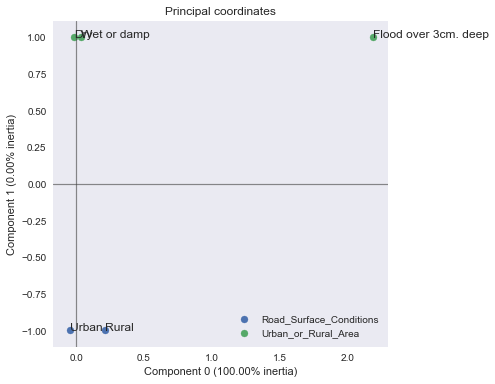

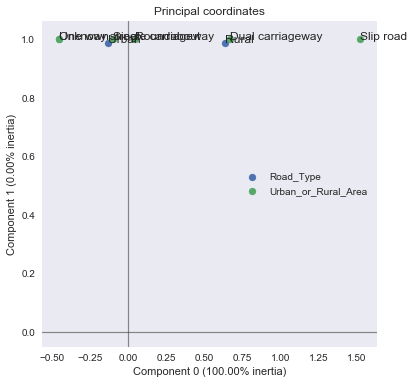

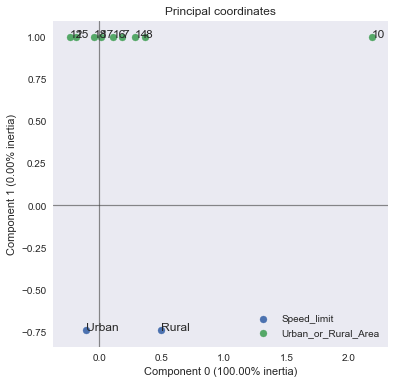

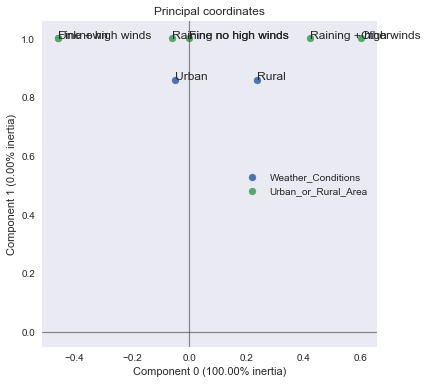

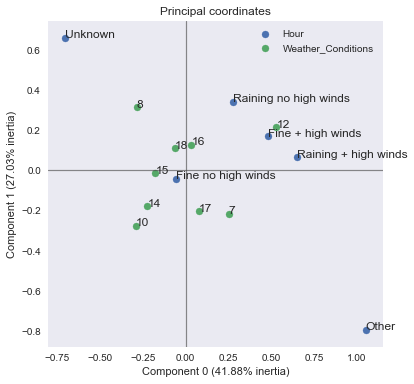

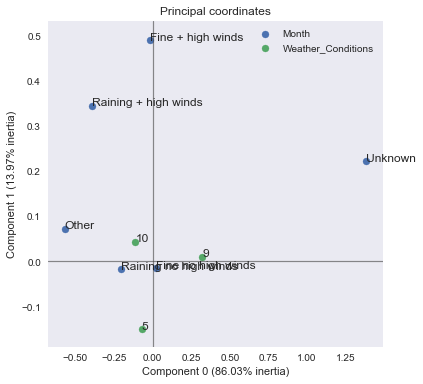

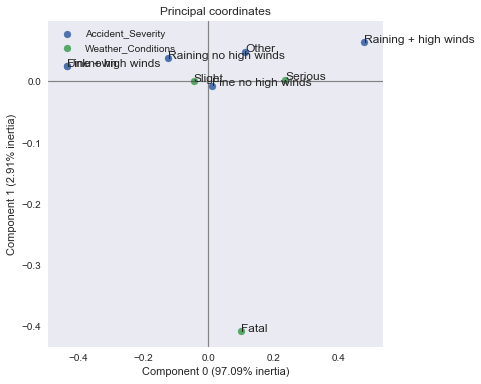

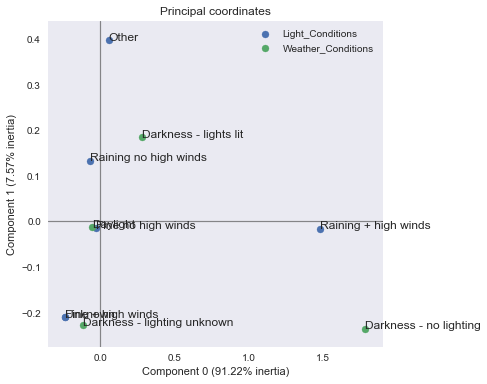

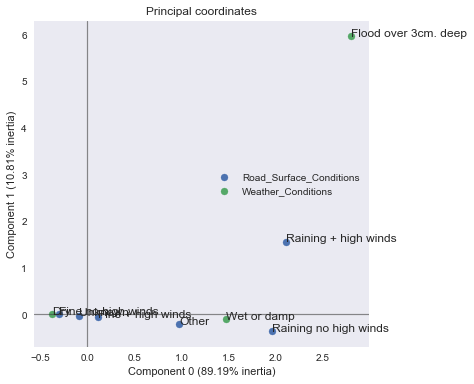

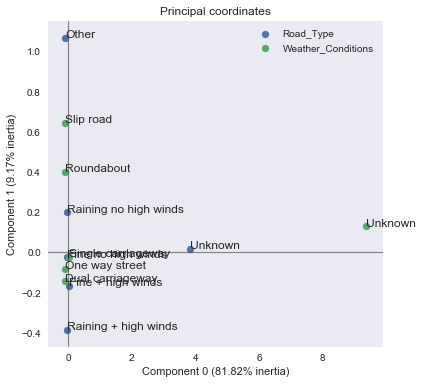

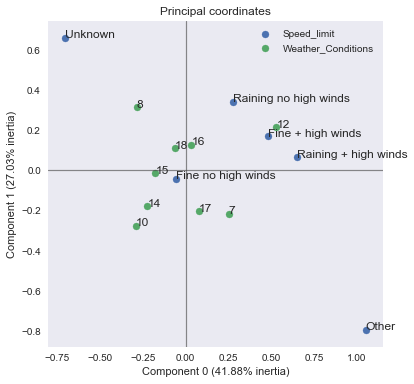

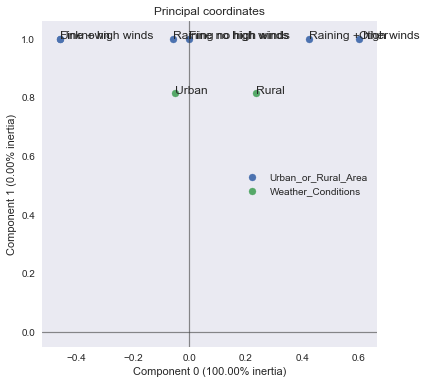

In [684]:
for idx,col1 in enumerate(variables): 

    for jdx,col2 in enumerate(variables): 
        
        if col1 != col2:
            table = pd.pivot_table(accidents_with_rategroup[accidents_with_rategroup["AccidentRateGroup"]=="high"], values="Accident_Index", \
                                   index=[col1], \
                                   columns=[col2], \
                                   aggfunc=np.count_nonzero).fillna(0)

            ca = prince.CA(n_components=2,n_iter=3,copy=True,check_input=True,engine='auto',random_state=42)
            table.columns.rename(col1,inplace=True)
            table.index.rename(col2,inplace=True)
            ca.fit(table)

            ax = ca.plot_coordinates(X=table,ax=None,figsize=(6, 6),x_component=0,y_component=1,show_row_labels=True,show_col_labels=True)
            ax.get_figure().savefig(REPORTS_DIR + "high\\high_"+ col1 + "_" + col2 + "_ca.png")